# **ANALISI DATI COVID KOREA**

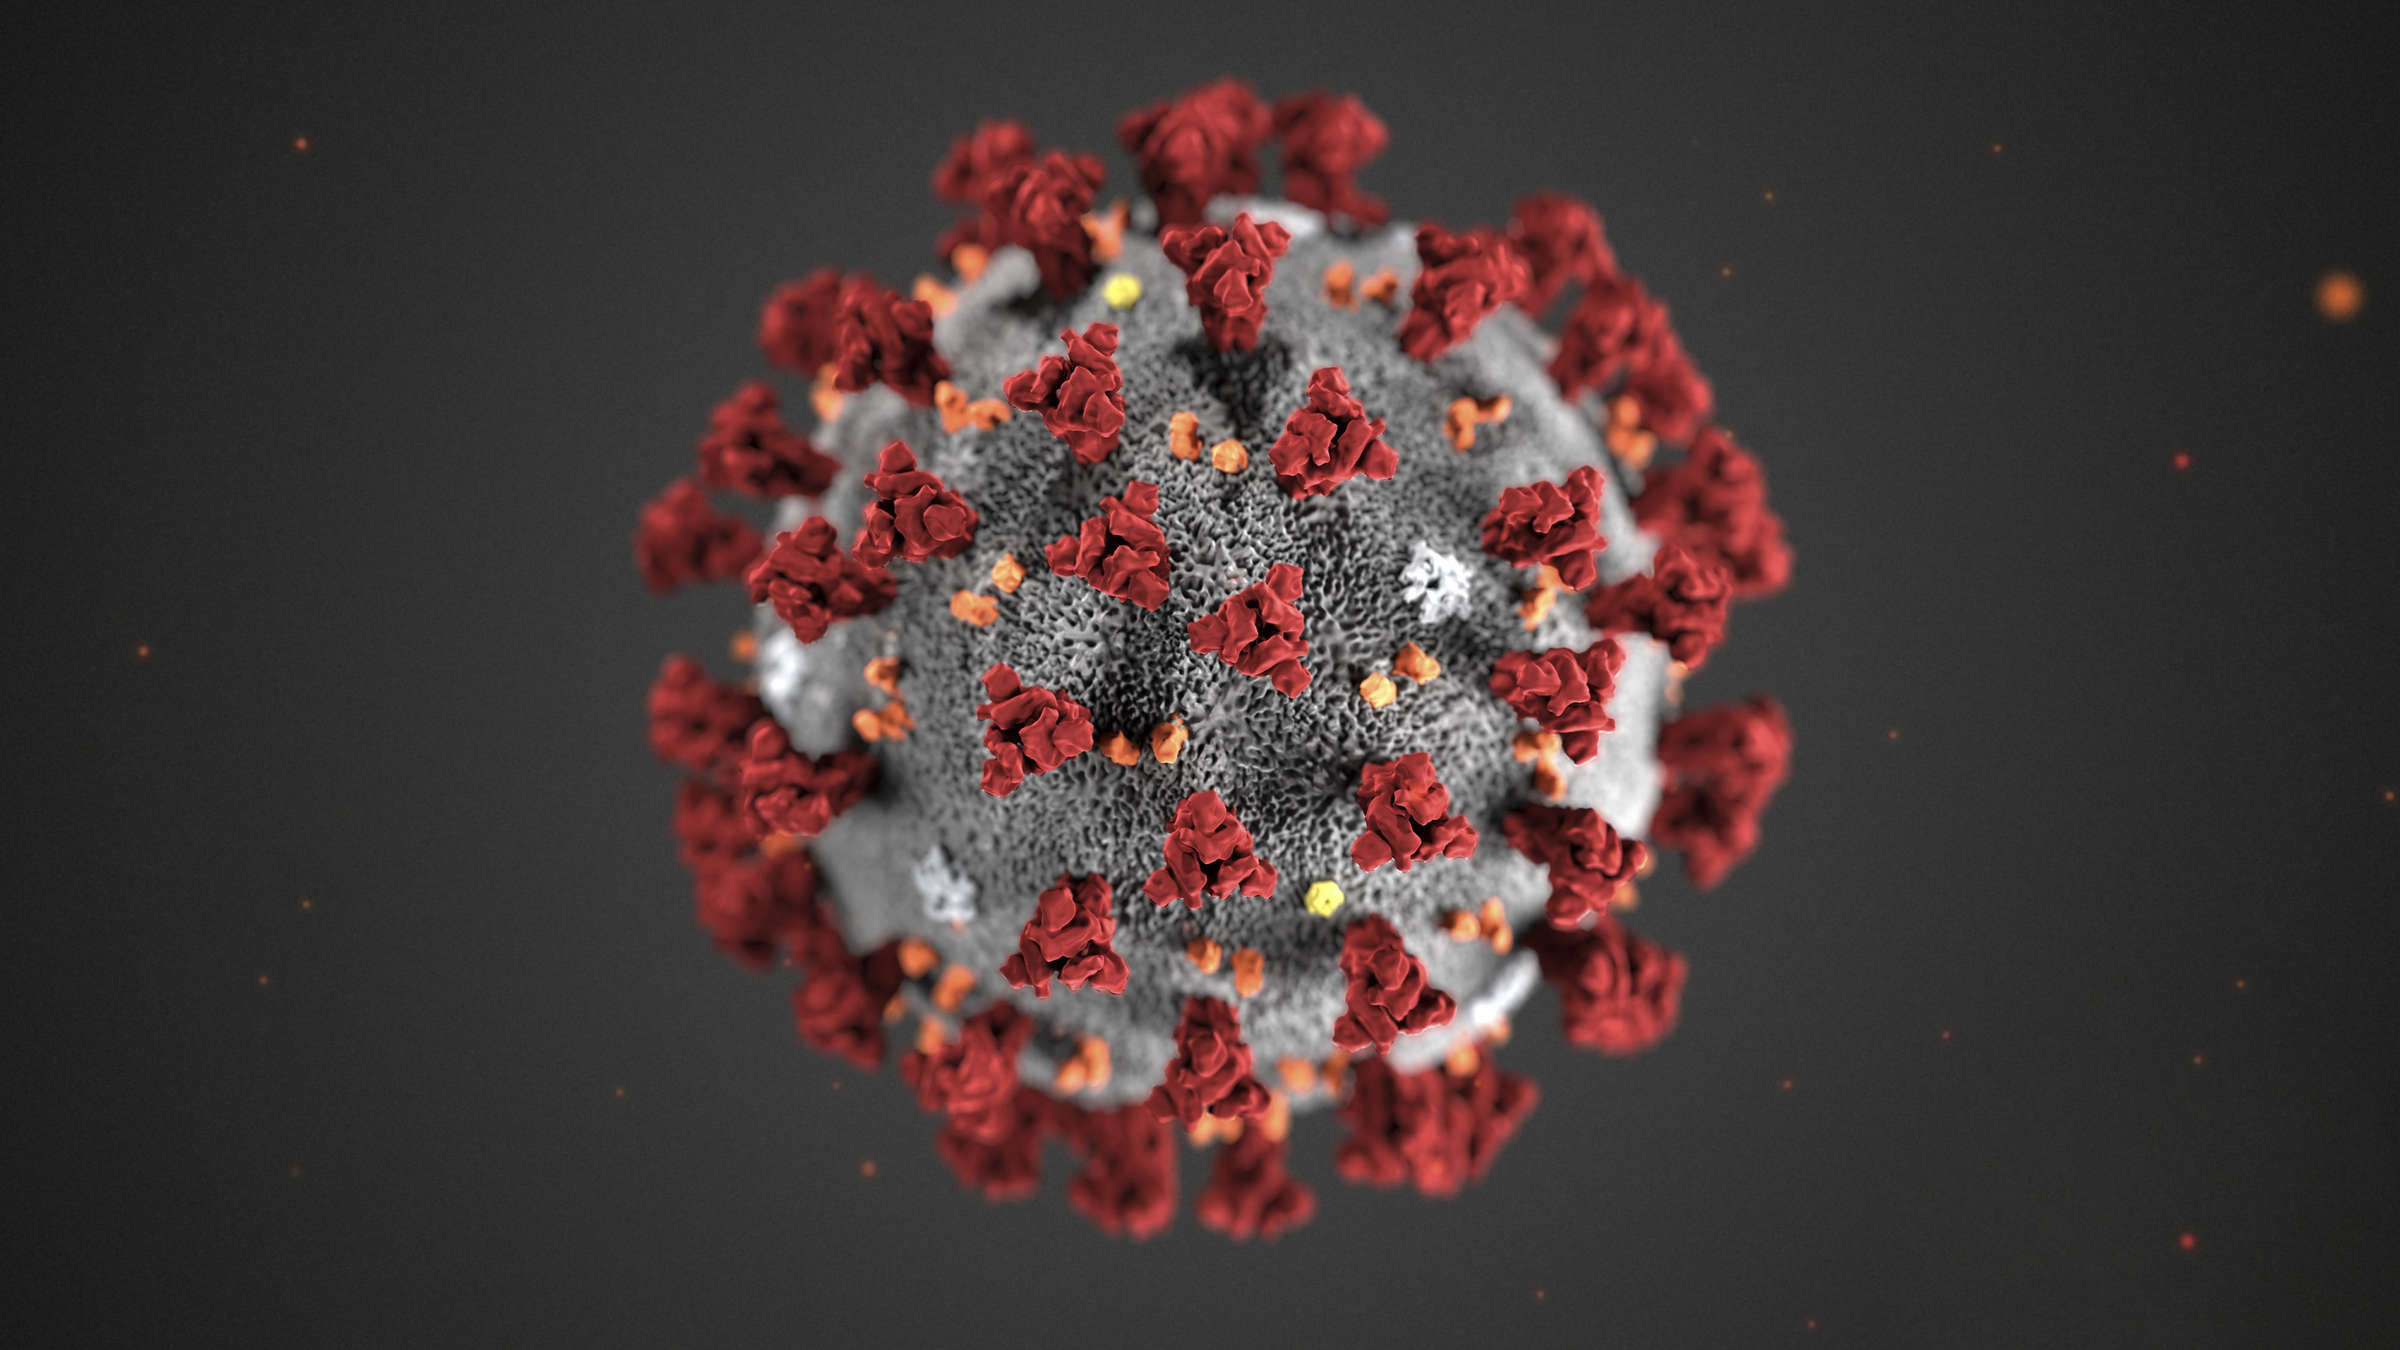

# **Step 1. Importo le librerie e datasets necessari ed ETL**

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import plotly.express as px
import plotly.figure_factory as ff
import warnings
import math
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
%matplotlib inline

import folium 
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

from datetime import datetime
import json 
from datetime import datetime

####**Import da Jupyter**

In [ ]:
#import io
#case = p_info = pd.read_csv('Case.csv')
#p_info = pd.read_csv('PatientInfo.csv')
#time = pd.read_csv('Time.csv')
#t_age = pd.read_csv('TimeAge.csv')
#t_gender = pd.read_csv('TimeGender.csv')
#t_province = pd.read_csv('TimeProvince.csv')
#region = pd.read_csv('Region.csv')
#weather = pd.read_csv('Weather.csv')
#search = pd.read_csv('SearchTrend.csv')
#floating = pd.read_csv('SeoulFloating.csv')
#policy = pd.read_csv('Policy.csv')
#population = pd.read_csv('Population_2020.csv')

####**Import da Colab**

In alternativa all utilizzo in jupyter, per fare l'import attraverso Drive bisognerà prima dare consenso all accesso e successivamente salvarsi i vari file csv all'intero di una cartella chiamata 'CovidKorea' nella home page di drive

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import io
case = p_info = pd.read_csv('gdrive/My Drive/CovidKorea/Case.csv',index_col=0)
p_info = pd.read_csv('gdrive/My Drive/CovidKorea/PatientInfo.csv',index_col=0)
time = pd.read_csv('gdrive/My Drive/CovidKorea/Time.csv')
t_age = pd.read_csv('gdrive/My Drive/CovidKorea/TimeAge.csv')
t_gender = pd.read_csv('gdrive/My Drive/CovidKorea/TimeGender.csv')
t_province = pd.read_csv('gdrive/My Drive/CovidKorea/TimeProvince.csv')
region = pd.read_csv('gdrive/My Drive/CovidKorea/Region.csv',index_col=0)
weather = pd.read_csv('gdrive/My Drive/CovidKorea/Weather.csv')
search = pd.read_csv('gdrive/My Drive/CovidKorea/SearchTrend.csv')
floating = pd.read_csv('gdrive/My Drive/CovidKorea/SeoulFloating.csv')
policy = pd.read_csv('gdrive/My Drive/CovidKorea/Policy.csv',index_col=0)
population = pd.read_csv('gdrive/My Drive/CovidKorea/Population_2020.csv')


# **Step 2. Descrizione dei datasets**

- Il significato del colore è che hanno proprietà simili.
- Se una linea è collegata tra le colonne, significa che i valori delle colonne sono parzialmente condivisi.
- Le linee tratteggiate indicano una scarsa rilevanza.
![db_0701](https://user-images.githubusercontent.com/50820635/86225695-8dca0580-bbc5-11ea-9e9b-b0ca33414d8a.PNG)



***


### **Livelli delle divisioni amministrative in Corea del Sud**
> #### Livello superiore (divisioni a livello provinciale)
- **Città Speciale**:
*Seoul*
- **Città Metropolitane**:
*Busan / Daegu / Daejeon / Gwangju / Incheon / Ulsan*
- **Province(-do)**:
*Gyeonggi-do / Gangwon-do / Chungcheongbuk-do / Chungcheongnam-do / Jeollabuk-do / Jeollanam-do / Gyeongsangbuk-do / Gyeongsangnam-do*

> #### Livello inferiore (divisioni a livello comunale)
- **Città(-si)**
[List delle città in Korea](https://en.wikipedia.org/wiki/List_of_cities_in_South_Korea)
- **Paese(-gun)**
[Lista dei Paesi in Korea](https://en.wikipedia.org/wiki/List_of_counties_of_South_Korea)
- **Distretto(-gu)**
[Lista dei distretti in Korea](https://en.wikipedia.org/wiki/List_of_districts_in_South_Korea)

***

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2815958%2F1c50702025f44b0c1ce92460bd2ea3f9%2Fus_hi_30-1.jpg?generation=1582819435038273&amp;alt=media" width=700>

***

##**1) Dati del caso**

> **Case:** dati di casi di infezione da COVID-19 in Corea del Sud



1. case_id: l'ID del caso di infezione
  > - case_id = region_code + case_number
- province: Città Speciale / Città Metropolitana / Provincia (-do)
- city Città (-si) / Paese (-gun) / Distretto (-gu)
- group: TRUE: infezione di gruppo / FALSE: non gruppo
  > - Se il valore è "TRUE" in questa colonna, il valore di "infezioni_casi" indica il nome del gruppo.
  > - I valori denominati "contatto con il paziente", "afflusso dall'estero" e "ecc." Non sono infezioni di gruppo.
  > - Il valore "from another city" significa che dove è iniziata l'infezione di gruppo è un'altra città.
- caso_infezione: il caso di infezione (il nome del gruppo o altri casi)
  > - Il valore "afflusso dall'estero" significa che l'infezione proviene da un altro paese.
  > - Il valore "ecc." Include i casi individuali, i casi in cui la classificazione della pertinenza è in corso dopo l'indagine e i casi sotto inchiesta.
- confirmed: il numero accumulato dei confermati
- latitude: la latitudine del gruppo
- longitude: la longitudine del gruppo

In [ ]:
case.head()

province          city  group  ... confirmed   latitude   longitude
 case_id                                ...                                 
1000001     Seoul    Yongsan-gu   True  ...       139  37.538621  126.992652
1000002     Seoul     Gwanak-gu   True  ...       119   37.48208  126.901384
1000003     Seoul       Guro-gu   True  ...        95  37.508163  126.884387
1000004     Seoul  Yangcheon-gu   True  ...        43  37.546061  126.874209
1000005     Seoul     Dobong-gu   True  ...        43  37.679422  127.044374

[5 rows x 7 columns]

In [ ]:
case.describe()

confirmed
count   174.000000
mean     65.488506
std     355.097654
min       0.000000
25%       4.000000
50%      10.000000
75%      31.750000
max    4511.000000

In [ ]:
#Conversione da carattere a valore nil
case.latitude[(case.latitude=='-')]= np.nan
case.longitude[(case.longitude=='-')]= np.nan


In [ ]:
case.head(10)

province             city  group  ... confirmed   latitude   longitude
 case_id                                   ...                                 
1000001     Seoul       Yongsan-gu   True  ...       139  37.538621  126.992652
1000002     Seoul        Gwanak-gu   True  ...       119   37.48208  126.901384
1000003     Seoul          Guro-gu   True  ...        95  37.508163  126.884387
1000004     Seoul     Yangcheon-gu   True  ...        43  37.546061  126.874209
1000005     Seoul        Dobong-gu   True  ...        43  37.679422  127.044374
1000006     Seoul          Guro-gu   True  ...        41  37.481059  126.894343
1000007     Seoul  from other city   True  ...        36        NaN         NaN
1000008     Seoul    Dongdaemun-gu   True  ...        17  37.592888  127.056766
1000009     Seoul  from other city   True  ...        25        NaN         NaN
1000010     Seoul        Gwanak-gu   True  ...        30  37.481735  126.930121

[10 rows x 7 columns]

In [ ]:
case.isnull().sum()

province            0
city                0
group               0
infection_case      0
confirmed           0
latitude          109
longitude         109
dtype: int64

In [ ]:
case["latitude"]=case["latitude"].astype(float)
case["longitude"]=case["longitude"].astype(float)

In [ ]:
case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 1000001 to 7000004
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province        174 non-null    object 
 1   city            174 non-null    object 
 2   group           174 non-null    bool   
 3   infection_case  174 non-null    object 
 4   confirmed       174 non-null    int64  
 5   latitude        65 non-null     float64
 6   longitude       65 non-null     float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 9.7+ KB


In [ ]:
case.describe()

confirmed   latitude   longitude
count   174.000000  65.000000   65.000000
mean     65.488506  36.694051  127.584885
std     355.097654   0.911466    0.823087
min       0.000000  35.078825  126.316746
25%       4.000000  35.848190  126.956405
50%      10.000000  37.000354  127.113900
75%      31.750000  37.522331  128.466653
max    4511.000000  37.758635  129.125600

##**2) Dati del paziente**


> **PatientInfo:** dati epidemiologici di pazienti COVID-19 in Corea del Sud



1. Patient_id: l'ID del paziente
  > - Pati_id = codice_regionale + numero_paziente
  > - Esistono due tipi di numero_paziente
      1) local_num: il numero fornito dal governo locale.
      2) global_num: il numero fornito dal KCDC.
- sesso: il sesso del paziente
- età: l'età del paziente
  > - 0 : 0 ~ 9
  > - 10 : 10 ~ 19
  ...
  > - 90: 90 ~ 99
  > - 100 : 100 ~ 109
- paese: il paese del paziente
- provincia: la provincia del paziente
- città: la città del paziente
- Infezione_caso: il caso di infezione
- Infetto_by: l'ID di chi ha infettato il paziente
  > - Questa colonna fa riferimento alla colonna "Patient_id".
- contact_number: il numero di contatti con le persone
- sintom_onset_date: la data di insorgenza dei sintomi
- Confirm_date: la data di conferma
- Release_date: la data di rilascio
- deceased_date: la data del decesso
- state: isolato / rilasciato / deceduto
  > - isolato: essere isolato in ospedale
  > - rilasciato: essere dimesso dall'ospedale
  > - defunto: essere deceduto

In [ ]:
p_info.head()

sex  age country  ... released_date deceased_date     state
patient_id                       ...                                      
1000000001    male  50s   Korea  ...    2020-02-05           NaN  released
1000000002    male  30s   Korea  ...    2020-03-02           NaN  released
1000000003    male  50s   Korea  ...    2020-02-19           NaN  released
1000000004    male  20s   Korea  ...    2020-02-15           NaN  released
1000000005  female  20s   Korea  ...    2020-02-24           NaN  released

[5 rows x 13 columns]

In [ ]:
p_info.describe()

sex   age country  ... released_date deceased_date     state
count     4043  3785    5165  ...          1587            66      5165
unique       2    11      16  ...           130            39         3
top     female   20s   Korea  ...    2020-03-20    2020-03-05  released
freq      2218   899    5123  ...            71             4      2929

[4 rows x 13 columns]

In [ ]:
#p_info.dropna(subset=['sex'], inplace=True) # elimina i valori NaN
p_info['age'] =p_info['age'].str.replace('s', '') #sostituisco la 's' a fine numero di età con il campo vuoto

In [ ]:
p_info['age'] =p_info['age'].astype(float) #modifico il tipo da stringa a float

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 4043 non-null   object 
 1   age                 3785 non-null   float64
 2   country             5165 non-null   object 
 3   province            5165 non-null   object 
 4   city                5071 non-null   object 
 5   infection_case      4246 non-null   object 
 6   infected_by         1346 non-null   object 
 7   contact_number      791 non-null    object 
 8   symptom_onset_date  690 non-null    object 
 9   confirmed_date      5162 non-null   object 
 10  released_date       1587 non-null   object 
 11  deceased_date       66 non-null     object 
 12  state               5165 non-null   object 
dtypes: float64(1), object(12)
memory usage: 564.9+ KB


In [ ]:
#dei valori mancanti ne faccio un fill con la media decade
media = p_info['age'].mean()
quoziente = int(media)/10
media_decade = quoziente*10
p_info['age']=p_info['age'].fillna(media_decade)

In [ ]:
p_info['age'] =p_info['age'].astype(int) #modifico il tipo da stringa a int

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5071 non-null   object
 5   infection_case      4246 non-null   object
 6   infected_by         1346 non-null   object
 7   contact_number      791 non-null    object
 8   symptom_onset_date  690 non-null    object
 9   confirmed_date      5162 non-null   object
 10  released_date       1587 non-null   object
 11  deceased_date       66 non-null     object
 12  state               5165 non-null   object
dtypes: int64(1), object(12)
memory usage: 564.9+ KB


> Le città mancanti vengono riempite con il valore della **moda** della città per la provincia in questione

In [ ]:
#p_city = p_info.city.isnull() #vettore con true e false delle varie città mancanti dal dataset

#lista_prov = p_info[p_info['city'].isnull()].province.unique().tolist() #creo una lista con le varie province

#for prov in lista_prov:
#  if prov=='Gwangju': #non abbiamo valori di città per questa provincia, perciò non potremo farne la media
#    moda_prov='Gwangju'
#  else :
#    moda_prov1=p_info[(p_info['province']==prov)].city.mode() # moda della città divisa per le varie province
#    moda_prov=moda_prov1.loc[0]

#  p_cond = p_info[(p_info['province']==prov)].city.fillna(moda_prov) #riempio quella città mancante con la moda per la provincia

#  i=0
#  for cond in ((p_info['province']==prov) & (p_city)):
#    if cond:
#      p_info.city[p_info.index[i]]= p_cond[p_info.index[i]]  
#    i=i+1

In [ ]:
p_city = p_info.city.isnull() #vettore con true e false delle varie città mancanti dal dataset

lista_prov = p_info[p_info['city'].isnull()].province.unique().tolist() #creo una lista con le varie province

for prov in lista_prov:
  if prov=='Gwangju': #non abbiamo valori di città per questa provincia, perciò non potremo farne la media
    moda_prov='Gwangju'
  else :
    moda_prov1=p_info[(p_info['province']==prov)].city.mode() #moda delle varie province
    moda_prov=moda_prov1.loc[0]
  i=0
  for cond in p_info['province']==prov:
    if cond:
      if (p_city[p_city.index[i]]).any():
        p_info.city[p_info.index[i]]=moda_prov #riempio quella città mancante con la moda per la provincia
    i=i+1

p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      4246 non-null   object
 6   infected_by         1346 non-null   object
 7   contact_number      791 non-null    object
 8   symptom_onset_date  690 non-null    object
 9   confirmed_date      5162 non-null   object
 10  released_date       1587 non-null   object
 11  deceased_date       66 non-null     object
 12  state               5165 non-null   object
dtypes: int64(1), object(12)
memory usage: 724.9+ KB


> Sulle colonne vuote della "infection_case" andiamo a dire che non si sono conosciute le cause dell'infezione.

In [ ]:
p_info['infection_case']=p_info['infection_case'].fillna('unknown')

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         1346 non-null   object
 7   contact_number      791 non-null    object
 8   symptom_onset_date  690 non-null    object
 9   confirmed_date      5162 non-null   object
 10  released_date       1587 non-null   object
 11  deceased_date       66 non-null     object
 12  state               5165 non-null   object
dtypes: int64(1), object(12)
memory usage: 724.9+ KB


> Sulle colonne vuote della "infected_by" andiamo a scrivere che il paziente non si sà da chi è stato infettato.

In [ ]:
p_info['infected_by']=p_info['infected_by'].fillna('patient not found')
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         5165 non-null   object
 7   contact_number      791 non-null    object
 8   symptom_onset_date  690 non-null    object
 9   confirmed_date      5162 non-null   object
 10  released_date       1587 non-null   object
 11  deceased_date       66 non-null     object
 12  state               5165 non-null   object
dtypes: int64(1), object(12)
memory usage: 724.9+ KB


> Eliminiamo la colonna "contact_number" dato che sono pochi valori

In [ ]:
p_info.drop('contact_number', axis=1, inplace=True)

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         5165 non-null   object
 7   symptom_onset_date  690 non-null    object
 8   confirmed_date      5162 non-null   object
 9   released_date       1587 non-null   object
 10  deceased_date       66 non-null     object
 11  state               5165 non-null   object
dtypes: int64(1), object(11)
memory usage: 684.6+ KB


> Abbia visto nel dataset quali erano le date prima a quelle mancati e quelle successive e, in base a queste, abbiamo riempito tali tre valori mancanti.

In [ ]:
p_info[p_info['confirmed_date'].isnull()].index.tolist() #sulla connfirmed_date mancano tre date nel dataset

[6011000051, 6011000052, 6011000053]

In [ ]:
p_info.loc[6011000050]

sex                                male
age                                  70
country                           Korea
province               Gyeongsangbuk-do
city                          Andong-si
infection_case                      etc
infected_by           patient not found
symptom_onset_date           2020-04-01
confirmed_date               2020-04-04
released_date                       NaN
deceased_date                       NaN
state                          released
Name: 6011000050, dtype: object

In [ ]:
p_info['confirmed_date']=p_info['confirmed_date'].fillna('2020-04-20')

> Media dei giorni in ospedale dopo che il paziente ha confermato il virus

In [ ]:
dateFormatter = "%Y-%m-%d"
p_released= p_info.released_date.isnull()

somma=timedelta(0)
k=0

for i in p_info.index:
  if not p_released[i].any():
    data1 = datetime.strptime(p_info.released_date[i], dateFormatter)
    data2 = datetime.strptime(p_info.confirmed_date[i], dateFormatter)
    diff = data1-data2
    somma = somma + diff
    k = k+1

media_rilascio = somma/k 
media_rilascio


datetime.timedelta(24, 63207, 561437)

In [ ]:
media_rilascio_giorni = timedelta(media_rilascio.days)
media_rilascio_giorni

datetime.timedelta(24)

> La data di rilascio sarà la somma della data di conferma più la media dei giorni di rilascio

In [ ]:
p_state = (p_info.state == 'released') #abbiamo riempito solo le righe 'released'

for i in p_info.index: 
  if p_state[i].any():
    if p_released[i].any():
      data_confirmed = datetime.strptime(p_info.confirmed_date[i], dateFormatter)
      p_info.released_date[i] = data_confirmed + media_rilascio_giorni


Vediamo come coincidono le 'released_date' con le 'released' nel campo "State".

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         5165 non-null   object
 7   symptom_onset_date  690 non-null    object
 8   confirmed_date      5165 non-null   object
 9   released_date       2937 non-null   object
 10  deceased_date       66 non-null     object
 11  state               5165 non-null   object
dtypes: int64(1), object(11)
memory usage: 684.6+ KB


> Data di morte **in media** dei pazienti dopo esser stati confermati


In [ ]:
dateFormatter = "%Y-%m-%d"
p_deceased= p_info.deceased_date.isnull()

somma=timedelta(0)
k=0

for i in p_info.index:
  if not p_deceased[i].any():
    data1 = datetime.strptime(p_info.deceased_date[i], dateFormatter)
    data2 = datetime.strptime(p_info.confirmed_date[i], dateFormatter)
    diff_deceased = data1-data2
    somma = somma + diff
    k = k+1

media_morte = somma/k
media_morte

datetime.timedelta(8)

In [ ]:
p_state_death = (p_info.state == 'deceased') #riempiamo solo le righe che nella "State" hanno dicitura 'deceased'

for i in p_info.index: 
  if p_state_death[i].any():
    if p_deceased[i].any():
      data_confirmed = datetime.strptime(p_info.confirmed_date[i], dateFormatter)
      p_info.deceased_date[i] = data_confirmed + media_morte

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sex                 4043 non-null   object
 1   age                 5165 non-null   int64 
 2   country             5165 non-null   object
 3   province            5165 non-null   object
 4   city                5165 non-null   object
 5   infection_case      5165 non-null   object
 6   infected_by         5165 non-null   object
 7   symptom_onset_date  690 non-null    object
 8   confirmed_date      5165 non-null   object
 9   released_date       2937 non-null   object
 10  deceased_date       78 non-null     object
 11  state               5165 non-null   object
dtypes: int64(1), object(11)
memory usage: 684.6+ KB


> Trasformo le tre colonne in date

In [ ]:
p_info['released_date']= pd.to_datetime(p_info['released_date'])
p_info['confirmed_date']= pd.to_datetime(p_info['confirmed_date'])
p_info['deceased_date']= pd.to_datetime(p_info['deceased_date'])
p_info['symptom_onset_date']=pd.to_datetime(p_info['symptom_onset_date'], errors='coerce') #coerce serve per togliere un valore mismatched nel dataframe

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sex                 4043 non-null   object        
 1   age                 5165 non-null   int64         
 2   country             5165 non-null   object        
 3   province            5165 non-null   object        
 4   city                5165 non-null   object        
 5   infection_case      5165 non-null   object        
 6   infected_by         5165 non-null   object        
 7   symptom_onset_date  689 non-null    datetime64[ns]
 8   confirmed_date      5165 non-null   datetime64[ns]
 9   released_date       2937 non-null   datetime64[ns]
 10  deceased_date       78 non-null     datetime64[ns]
 11  state               5165 non-null   object        
dtypes: datetime64[ns](4), int64(1), object(7)
memory usage: 684.6+ KB


##**3) Dati di serie storiche**

> **Time:** dati di serie temporali dello stato di COVID-19 in Corea del Sud

> **TimeAge:** dati di serie temporali dello stato COVID-19 in termini di età in Corea del Sud

> **TimeGender:** dati di serie temporali dello stato COVID-19 in termini di genere in Corea del Sud

> **TimeProvince:** dati di serie temporali dello stato COVID-19 in termini di provincia in Corea del Sud

#### 3.1) Dati di serie temporali dello stato di COVID-19 in Corea del Sud
- data: AAAA-MM-GG
- time: Time (0 = AM 12:00 / 16 = PM 04:00)
   > - L'ora in cui KCDC mette a disposizione le informazioni è stata modificata dalle 04:00 alle 12:00 dal 2 marzo.
- test: il numero di test accumulati
   > - Un test è una diagnosi di infezione.
- negativo: il numero accumulato di risultati negativi
- confermato: il numero di risultati positivi accumulati
- rilasciato: il numero accumulato di rilasci
- deceduto: il numero accumulato di decessi

In [ ]:
time.head()

date  time  test  negative  confirmed  released  deceased
0  2020-01-20    16     1         0          1         0         0
1  2020-01-21    16     1         0          1         0         0
2  2020-01-22    16     4         3          1         0         0
3  2020-01-23    16    22        21          1         0         0
4  2020-01-24    16    27        25          2         0         0

> Facciamo il casting delle stringhe in date

In [ ]:
time['date']= pd.to_datetime(time['date'])

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       163 non-null    datetime64[ns]
 1   time       163 non-null    int64         
 2   test       163 non-null    int64         
 3   negative   163 non-null    int64         
 4   confirmed  163 non-null    int64         
 5   released   163 non-null    int64         
 6   deceased   163 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 9.0 KB


#### 3.2) Serie temporali di dati sullo stato del COVID-19 in termini di età in Corea del Sud
- data: AAAA-MM-GG
- time: Time
- età: l'età dei pazienti
- confermato: il numero accumulato dei confermati
- defunto: il numero accumulato dei defunti

In [ ]:
t_age.head()

date  time  age  confirmed  deceased
0  2020-03-02     0   0s         32         0
1  2020-03-02     0  10s        169         0
2  2020-03-02     0  20s       1235         0
3  2020-03-02     0  30s        506         1
4  2020-03-02     0  40s        633         1

> Facciamo il casting delle stringhe in date

In [ ]:
t_age['date']= pd.to_datetime(t_age['date'])

> Modifichiamo la time age in modo da avete degli interi 

In [ ]:
t_age['age'] =t_age['age'].str.replace('s', '') #sostituisco la 's' a fine numero di età con il campo vuoto

In [ ]:
t_age['age'] =t_age['age'].astype(int) #modifico il tipo da stringa a float

In [ ]:
t_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1089 non-null   datetime64[ns]
 1   time       1089 non-null   int64         
 2   age        1089 non-null   int64         
 3   confirmed  1089 non-null   int64         
 4   deceased   1089 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 42.7 KB


#### 3.3) Serie temporali di dati sullo stato di COVID-19 in termini di sesso in Corea del Sud
- data: AAAA-MM-GG
- time: Time
- sesso: il sesso dei pazienti
- confermato: il numero accumulato dei confermati
- defunto: il numero accumulato dei defunti

In [ ]:
t_gender.head()

date  time     sex  confirmed  deceased
0  2020-03-02     0    male       1591        13
1  2020-03-02     0  female       2621         9
2  2020-03-03     0    male       1810        16
3  2020-03-03     0  female       3002        12
4  2020-03-04     0    male       1996        20

> Facciamo il casting delle stringhe in date

In [ ]:
t_gender['date']= pd.to_datetime(t_gender['date'])

In [ ]:
t_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       242 non-null    datetime64[ns]
 1   time       242 non-null    int64         
 2   sex        242 non-null    object        
 3   confirmed  242 non-null    int64         
 4   deceased   242 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.6+ KB


#### 3.4) Serie temporali di dati sullo stato COVID-19 in termini di provincia in Corea del Sud
- data: AAAA-MM-GG
- time: Time
- provincia: la provincia della Corea del Sud
- confermati: il numero accumulato dei confermati nella provincia
   > - Lo status confermato in termini di province è stato presentato dal 21 febbraio.
   > - Il valore prima del 21 febbraio può essere diverso.
- liberati: il numero accumulato dei liberati nella provincia
   > - Dal 5 marzo è stato presentato lo status confermato in termini di province.
   > - Il valore prima del 5 marzo può essere diverso.
- defunto: il numero accumulato dei defunti nella provincia
   > - Dal 5 marzo è stato presentato lo status confermato in termini di province.
   > - Il valore prima del 5 marzo può essere diverso.

In [ ]:
 t_province.head()

date  time province  confirmed  released  deceased
0  2020-01-20    16    Seoul          0         0         0
1  2020-01-20    16    Busan          0         0         0
2  2020-01-20    16    Daegu          0         0         0
3  2020-01-20    16  Incheon          1         0         0
4  2020-01-20    16  Gwangju          0         0         0

> Facciamo il casting delle stringhe in date

In [ ]:
t_province['date']= pd.to_datetime(t_province['date'])

In [ ]:
t_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2771 non-null   datetime64[ns]
 1   time       2771 non-null   int64         
 2   province   2771 non-null   object        
 3   confirmed  2771 non-null   int64         
 4   released   2771 non-null   int64         
 5   deceased   2771 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 130.0+ KB


##**4) Dati aggiuntivi**


> **Region:** posizione e dati statistici delle regioni della Corea del Sud

> **Weather:** dati del tempo nelle regioni della Corea del Sud

> **SearchTrend:** dati di tendenza delle parole chiave cercate in NAVER, uno dei più grandi portali della Corea del Sud

> **SeoulFloating:** dati sulla popolazione che è a Seoul ma non è contata nel censimento ufficiale della città.

> **Politicy:** dati della politica del governo per COVID-19 in Corea del Sud

#### 4.1) Posizione e dati statistici delle regioni della Corea del Sud
- codice: il codice della regione
- provincia: Città Speciale / Città Metropolitana / Provincia (-do)
- città: Città (-si) / Paese (-gun) / Distretto (-gu)
- latitudine: la latitudine della visita 
- longitudine: la longitudine della visita
- elementary_school_count: il numero di scuole elementari
- kindergarten_count: il numero di asili
- university_count: il numero di università
- academy_ratio: il rapporto delle accademie
- old_population_ratio: il rapporto tra la popolazione anziana
- senior_alone_ratio: il rapporto tra le famiglie anziane che vivono sole
- nursing_home_count: il numero di case di cura


In [ ]:
region.head()

province         city  ...  elderly_alone_ratio  nursing_home_count
code                         ...                                         
10000    Seoul        Seoul  ...                  5.8               22739
10010    Seoul   Gangnam-gu  ...                  4.3                3088
10020    Seoul  Gangdong-gu  ...                  5.4                1023
10030    Seoul   Gangbuk-gu  ...                  8.5                 628
10040    Seoul   Gangseo-gu  ...                  5.7                1080

[5 rows x 11 columns]

In [ ]:
region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 10000 to 80000
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   province                  244 non-null    object 
 1   city                      244 non-null    object 
 2   latitude                  244 non-null    float64
 3   longitude                 244 non-null    float64
 4   elementary_school_count   244 non-null    int64  
 5   kindergarten_count        244 non-null    int64  
 6   university_count          244 non-null    int64  
 7   academy_ratio             244 non-null    float64
 8   elderly_population_ratio  244 non-null    float64
 9   elderly_alone_ratio       244 non-null    float64
 10  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 22.9+ KB


#### 4.2) Dati del tempo nelle regioni della Corea del Sud
- codice: il codice della regione
- provincia: Città Speciale / Città Metropolitana / Provincia (-do)
- data: AAAA-MM-GG
- avg_temp: la temperatura media
- min_temp: la temperatura più bassa
- max_temp: la temperatura più alta
- precipitazione: la precipitazione giornaliera
- max_wind_speed: la velocità massima del vento
- most_wind_direction: la direzione del vento più frequente
- avg_relative_humidity: l'umidità relativa media



In [ ]:
weather.head()

code province  ... most_wind_direction  avg_relative_humidity
0  10000    Seoul  ...                90.0                   73.0
1  11000    Busan  ...               340.0                   52.1
2  12000    Daegu  ...               270.0                   70.5
3  13000  Gwangju  ...               230.0                   73.1
4  14000  Incheon  ...               180.0                   83.9

[5 rows x 10 columns]

> Facciamo il casting delle stringhe in date

In [ ]:
weather['date']= pd.to_datetime(weather['date'])

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26256 non-null  float64       
 4   min_temp               26266 non-null  float64       
 5   max_temp               26268 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26262 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *avg_temp* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_avg = weather[(weather['province']==prov)].avg_temp.mean()
media_prov_avg

14.381790499390997

In [ ]:
weather_avg_temp = weather.avg_temp.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_avg_temp:
  if wat:
    prov = weather.province[i]
    media_prov_avg = weather[(weather['province']==prov)].avg_temp.mean()
    weather.avg_temp[i] = media_prov_avg
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26266 non-null  float64       
 5   max_temp               26268 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26262 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *min_temp* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_min = weather[(weather['province']==prov)].min_temp.mean()
media_prov_min

8.817417783191235

In [ ]:
weather_min_temp = weather.min_temp.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_min_temp:
  if wat:
    prov = weather.province[i]
    media_prov_min = weather[(weather['province']==prov)].min_temp.mean()
    weather.min_temp[i] = media_prov_min
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26268 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26262 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *max_temp* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_max = weather[(weather['province']==prov)].max_temp.mean()
media_prov_max

17.755

In [ ]:
weather_max_temp = weather.max_temp.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_max_temp:
  if wat:
    prov = weather.province[i]
    media_prov_max = weather[(weather['province']==prov)].max_temp.mean()
    weather.max_temp[i] = media_prov_max
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26271 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26262 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *max_wind_speed* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_max_wind = weather[(weather['province']==prov)].max_wind_speed.mean()
media_prov_max_wind

6.14951278928136

In [ ]:
weather_max_wind_speed = weather.max_wind_speed.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_max_wind_speed:
  if wat:
    prov = weather.province[i]
    media_prov_max_wind = weather[(weather['province']==prov)].max_wind_speed.mean()
    weather.max_wind_speed[i] = media_prov_max_wind
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26271 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26271 non-null  float64       
 8   most_wind_direction    26242 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *most_wind_direction* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_most = weather[(weather['province']==prov)].most_wind_direction.mean()
media_prov_most

182.45432399512788

In [ ]:
weather_most_wind_direction = weather.most_wind_direction.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_most_wind_direction:
  if wat:
    prov = weather.province[i]
    media_prov_most = weather[(weather['province']==prov)].most_wind_direction.mean()
    weather.most_wind_direction[i] = media_prov_most
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26271 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26271 non-null  float64       
 8   most_wind_direction    26271 non-null  float64       
 9   avg_relative_humidity  26251 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


> Andiamo a riempire la colonna *avg_relative_humidity* mancanti del dataset con **la media** dei valori calcolati per quella determinata provincia.

In [ ]:
media_prov_avg_r = weather[(weather['province']==prov)].avg_relative_humidity.mean()
media_prov_avg_r

62.84190012180312

In [ ]:
weather_avg_relative_humidity= weather.avg_relative_humidity.isnull()

lista_prov1 = weather['province'].unique().tolist()
i=0

for wat in weather_avg_relative_humidity:
  if wat:
    prov = weather.province[i]
    media_prov_avg_r = weather[(weather['province']==prov)].avg_relative_humidity.mean()
    weather.avg_relative_humidity[i] = media_prov_avg_r
  i=i+1

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   code                   26271 non-null  int64         
 1   province               26271 non-null  object        
 2   date                   26271 non-null  datetime64[ns]
 3   avg_temp               26271 non-null  float64       
 4   min_temp               26271 non-null  float64       
 5   max_temp               26271 non-null  float64       
 6   precipitation          26271 non-null  float64       
 7   max_wind_speed         26271 non-null  float64       
 8   most_wind_direction    26271 non-null  float64       
 9   avg_relative_humidity  26271 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


Percentuale delle ricerche della parola "coronavirus" nel corso degli anni all'interno del motore di ricerca sud coreano NAVER

#### 4.3) Dati di tendenza delle parole chiave cercate in NAVER, uno dei più grandi portali della Corea del Sud
- date: AAAA-MM-GG
- cold: il volume di ricerca di "raffreddore" in lingua coreana

- flu: il volume di ricerca di "flu" in lingua coreana

- pneumonia: il volume di ricerca di "polmonite" in lingua coreana

- coronavirus: il volume di ricerca del "coronavirus" in lingua coreana
  



In [ ]:
search.head()

date     cold      flu  pneumonia  coronavirus
0  2016-01-01  0.11663  0.05590    0.15726      0.00736
1  2016-01-02  0.13372  0.17135    0.20826      0.00890
2  2016-01-03  0.14917  0.22317    0.19326      0.00845
3  2016-01-04  0.17463  0.18626    0.29008      0.01145
4  2016-01-05  0.17226  0.15072    0.24562      0.01381

In [ ]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


> Faccio il casting in data

In [ ]:
search['date']= pd.to_datetime(search['date'])

Per ogni giorno e per ogni distretto vedo quante persone sono circolate in quella zona di Seoul per ogni giorno e ogni fascia oraria, per fasce di età e per differenza di genere.

#### 4.4) Dati sulla popolazione fluttuante a Seoul, Corea del Sud (da SK Telecom Big Data Hub)

- date: AAAA-MM-GG
- hour: ora
- birth_year: l'anno di nascita della popolazione fluttuante
- sex: il sesso della popolazione fluttuante
- province: Città Speciale / Città Metropolitana / Provincia (-do)
- city: Città (-si) / Paese (-gun) / Distretto (-gu)
- fp_num: il numero di popolazione fluttuante

In [ ]:
floating.head()

date  hour  birth_year     sex province           city  fp_num
0  2020-01-01     0          20  female    Seoul      Dobong-gu   19140
1  2020-01-01     0          20    male    Seoul      Dobong-gu   19950
2  2020-01-01     0          20  female    Seoul  Dongdaemun-gu   25450
3  2020-01-01     0          20    male    Seoul  Dongdaemun-gu   27050
4  2020-01-01     0          20  female    Seoul     Dongjag-gu   28880

In [ ]:
floating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [ ]:
floating['date']= pd.to_datetime(floating['date'])

In [ ]:
floating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   date        1084800 non-null  datetime64[ns]
 1   hour        1084800 non-null  int64         
 2   birth_year  1084800 non-null  int64         
 3   sex         1084800 non-null  object        
 4   province    1084800 non-null  object        
 5   city        1084800 non-null  object        
 6   fp_num      1084800 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 57.9+ MB


#### 4.5) Dati della politica del governo per COVID-19 in Corea del Sud

- policy_id: l'ID della policy
- paese: il paese che ha implementato la politica
- tipo: il tipo di polizza
- gov_policy: la politica del governo
- dettaglio: il dettaglio della polizza
- data_inizio: la data di inizio della polizza
- end_date: la data di fine della polizza

In [ ]:
policy.head()

country         type  ...  start_date    end_date
policy_id                       ...                        
1           Korea        Alert  ...  2020-01-03  2020-01-19
2           Korea        Alert  ...  2020-01-20  2020-01-27
3           Korea        Alert  ...  2020-01-28  2020-02-22
4           Korea        Alert  ...  2020-02-23         NaN
5           Korea  Immigration  ...  2020-02-04         NaN

[5 rows x 6 columns]

In [ ]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     61 non-null     object
 1   type        61 non-null     object
 2   gov_policy  61 non-null     object
 3   detail      59 non-null     object
 4   start_date  61 non-null     object
 5   end_date    24 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB


> Riempiamo la colonna "detail" con la voce 'not detail'

In [ ]:
policy['detail']=policy['detail'].fillna('not detail')

> Facciamo in casting da stringa di data in data e riempiamo la colonna "end_date" con l'ultima data disponibile nel dataset

In [ ]:
policy['start_date']= pd.to_datetime(policy['start_date'])
policy['end_date']=policy['end_date'].fillna('2020-07-01')
policy['end_date']= pd.to_datetime(policy['end_date'])
policy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     61 non-null     object        
 1   type        61 non-null     object        
 2   gov_policy  61 non-null     object        
 3   detail      61 non-null     object        
 4   start_date  61 non-null     datetime64[ns]
 5   end_date    61 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 3.3+ KB


#### 4.6) Dati della popolazione nel 2020 in Corea del Sud

In [ ]:
population.rename(columns={'Unnamed: 0': 'Province', 'Unnamed: 1': 'Origin'}, inplace=True)

In [ ]:
population['Province'] =population['Province'].str.replace('0', '-')
population.head()

Province    Origin   age total      0~4  ...   85~89   90~94  95~99 100 or over
0      Seoul     Total  10,025,927  312,975  ...  78,957  30,220  8,816       6,197
1      Seoul    Korean   9,740,398  305,099  ...  78,768  30,144  8,788       6,175
2      Seoul  Forigner     285,529    7,876  ...     189      76     28          22
3  Jongno-gu     Total     162,860    3,759  ...   1,786     720    276         249
4  Jongno-gu    Korean     151,767    3,610  ...   1,778     718    276         249

[5 rows x 24 columns]

In [ ]:
for column in population.columns[2:]:
  population[column] =population[column].str.replace(',', '')
  population[column] =population[column].astype(int)

population.head()

Province    Origin  age total     0~4  ...  85~89  90~94  95~99  100 or over
0      Seoul     Total   10025927  312975  ...  78957  30220   8816         6197
1      Seoul    Korean    9740398  305099  ...  78768  30144   8788         6175
2      Seoul  Forigner     285529    7876  ...    189     76     28           22
3  Jongno-gu     Total     162860    3759  ...   1786    720    276          249
4  Jongno-gu    Korean     151767    3610  ...   1778    718    276          249

[5 rows x 24 columns]

In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Province     78 non-null     object
 1   Origin       78 non-null     object
 2   age total    78 non-null     int64 
 3   0~4          78 non-null     int64 
 4   5~9          78 non-null     int64 
 5   10~14        78 non-null     int64 
 6   15~19        78 non-null     int64 
 7   20~24        78 non-null     int64 
 8   25~29        78 non-null     int64 
 9   30~34        78 non-null     int64 
 10  35~39        78 non-null     int64 
 11  40~44        78 non-null     int64 
 12  45~49        78 non-null     int64 
 13  50~54        78 non-null     int64 
 14  55~59        78 non-null     int64 
 15  60~64        78 non-null     int64 
 16  65~69        78 non-null     int64 
 17  70~74        78 non-null     int64 
 18  75~79        78 non-null     int64 
 19  80~84        78 non-null     in

## **Dati non riguardanti il covid**

> #### **Dati Mondiali**

Le informazioni sulle rispettive colonne posso esser trovare all'indirizzo https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [ ]:
url9 = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
global_data = pd.read_csv(url9)
global_data = global_data[~global_data['location'].isin(['International'])]
global_data.tail(10)

iso_code continent  ... life_expectancy human_development_index
54924      ZWE    Africa  ...           61.49                   0.535
54925      ZWE    Africa  ...           61.49                   0.535
54926      ZWE    Africa  ...           61.49                   0.535
54927      ZWE    Africa  ...           61.49                   0.535
54928      ZWE    Africa  ...           61.49                   0.535
54929      ZWE    Africa  ...           61.49                   0.535
54930      ZWE    Africa  ...           61.49                   0.535
54931      ZWE    Africa  ...           61.49                   0.535
54932      ZWE    Africa  ...           61.49                   0.535
54933      ZWE    Africa  ...           61.49                   0.535

[10 rows x 52 columns]

In [ ]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54618 entries, 0 to 54933
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            54618 non-null  object 
 1   continent                           54285 non-null  object 
 2   location                            54618 non-null  object 
 3   date                                54618 non-null  object 
 4   total_cases                         54063 non-null  float64
 5   new_cases                           53874 non-null  float64
 6   new_cases_smoothed                  52923 non-null  float64
 7   total_deaths                        46004 non-null  float64
 8   new_deaths                          45831 non-null  float64
 9   new_deaths_smoothed                 52923 non-null  float64
 10  total_cases_per_million             54063 non-null  float64
 11  new_cases_per_million               53874

# **3. Analisi dei dati qualitativa**

In [ ]:
print( "Primo infetto in Corea:",time['date'][0])

Primo infetto in Corea: 2020-01-20 00:00:00


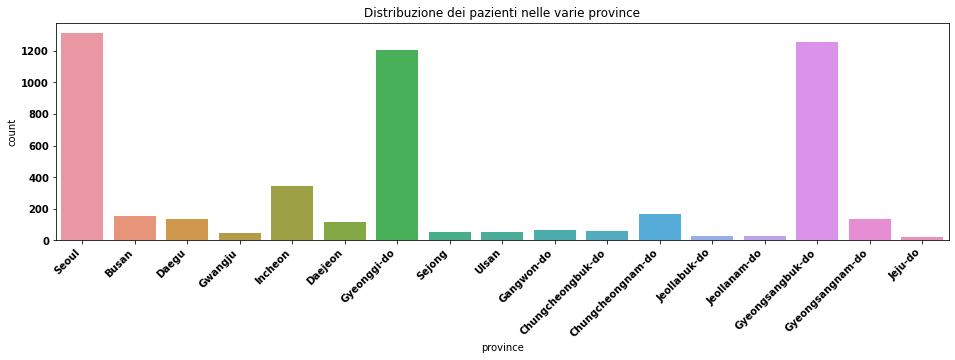

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(p_info['province'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribuzione dei pazienti nelle varie province')
plt.show()

C'è differenza tra il numero di donne e di uomini


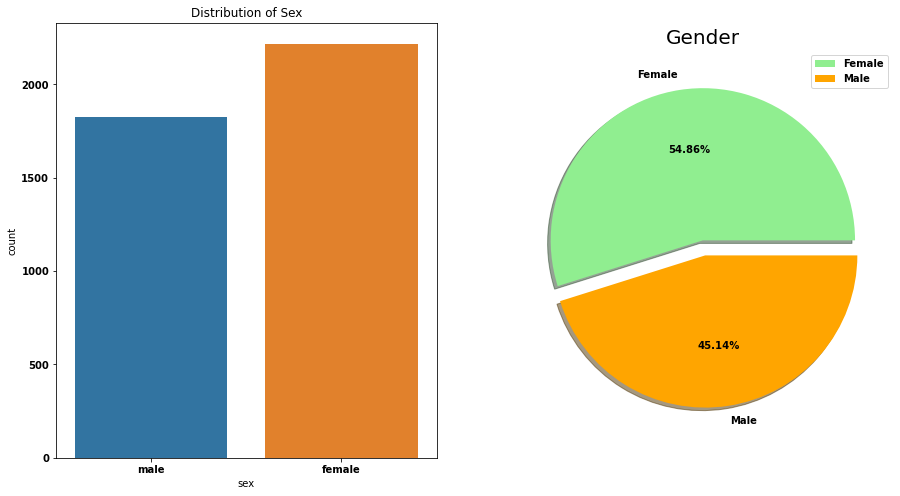

In [ ]:
print(f"C'è differenza tra il numero di donne e di uomini" )
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.countplot(p_info['sex'])
plt.title('Distribution of Sex')

plt.subplot(1, 2, 2)
labels = ['Female', 'Male']
size = p_info['sex'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]


plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

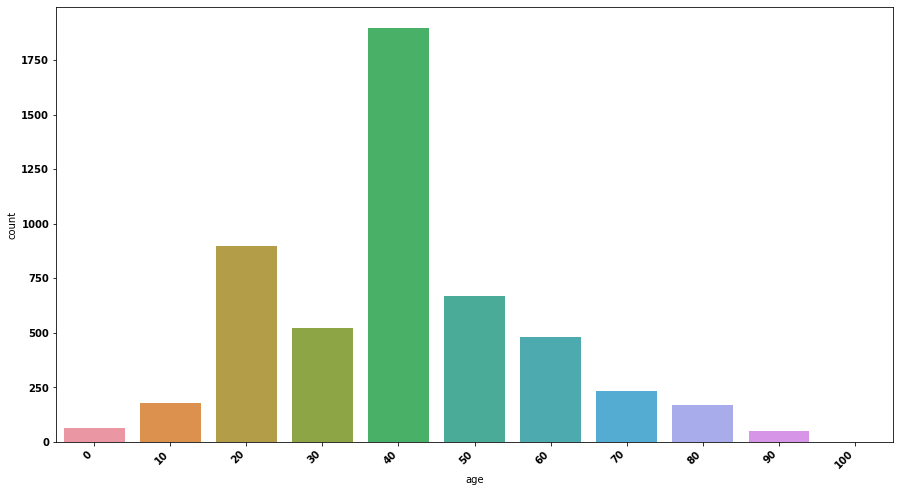

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(p_info['age'], order = p_info['age'].value_counts().sort_index().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Tuttavia tale differenza non ci porta a pensare che le donne siano più vulnerabili al COVID-19 rispetto agli uomini

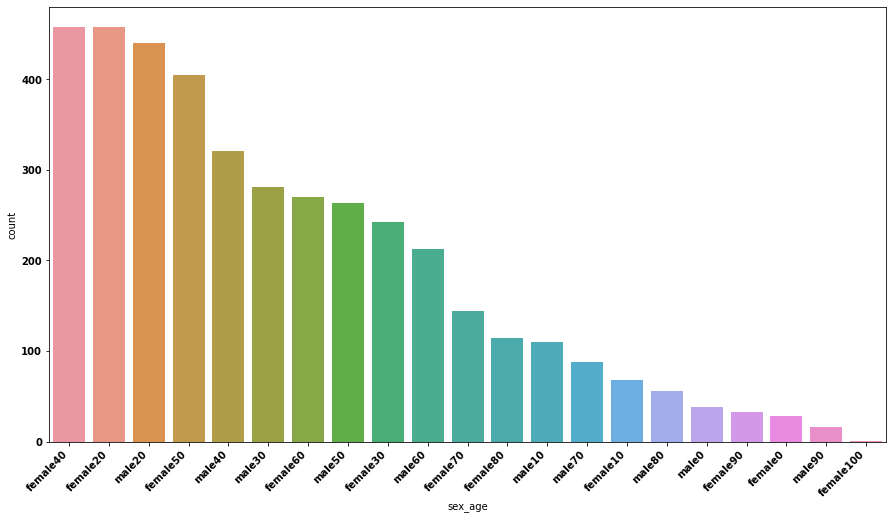

In [ ]:
plt.figure(figsize = (15,8))
p_info['sex_age']= p_info['sex'].str.cat((p_info['age']).values.astype(str))
ax = sns.countplot(p_info['sex_age'],
                   order = p_info['sex_age'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

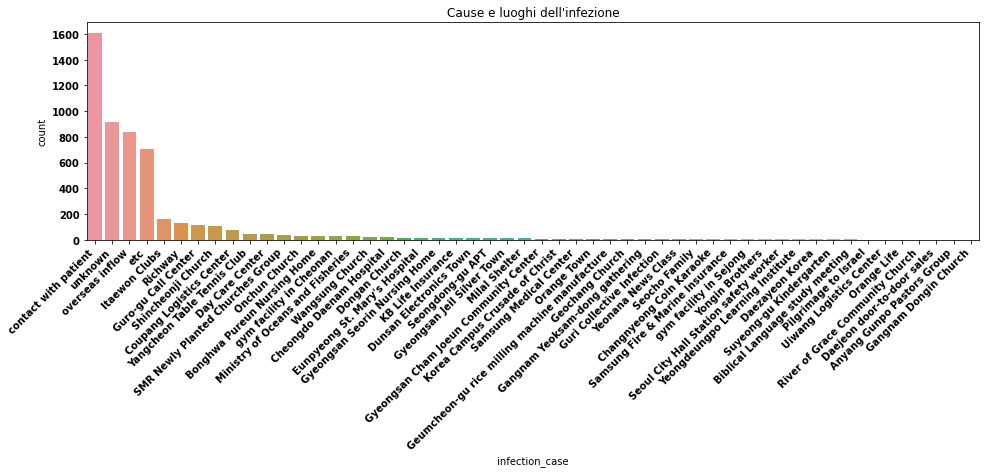

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(p_info['infection_case'],
                   order = p_info['infection_case'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title(f"Cause e luoghi dell'infezione")
plt.show()

In [ ]:
p_info['freq_age']=0
ages=p_info['age'].value_counts()

for i in ages.index:
    for j in ['male', 'female']:
        p_info.freq_age[(p_info.age==i)&(p_info.sex==j)]=len(p_info[(p_info.age==i)&(p_info.sex==j)])

fig = px.scatter(p_info, x="age", y="sex",
	         size="freq_age", color="freq_age",
                 hover_name="country", log_x=False, size_max=60)
fig.show()

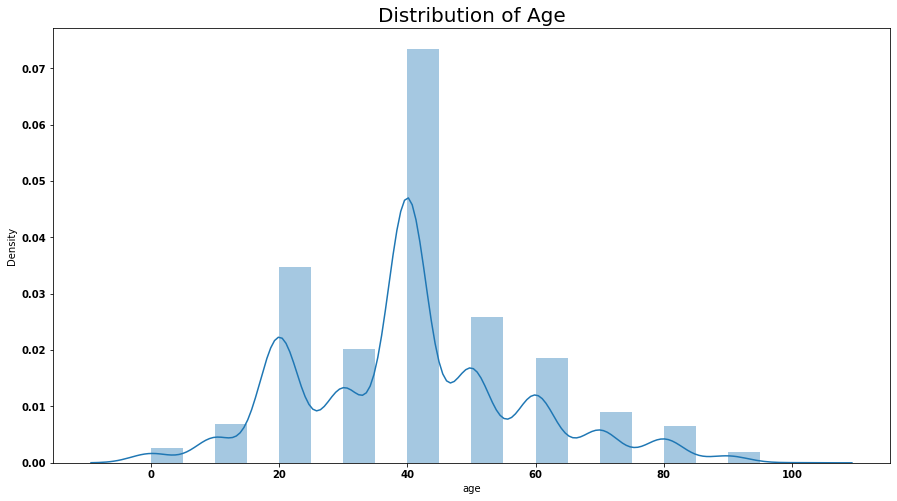

In [ ]:
#vedo più nel dettaglio la distribuzione dell'età ora
plt.figure(figsize=(15,8))
sns.distplot(p_info.age, kde=True, bins=20)
plt.title('Distribution of Age', fontsize = 20)
plt.show()  #tendo a avere clienti giovani

In [ ]:
provv=p_info.province.unique().tolist()
for i in ages.index:
    for j in provv:
        p_info.freq_age[(p_info.age==i)&(p_info.province==j)]=len(p_info[(p_info.age==i)&(p_info.province==j)])

fig = px.scatter(p_info, x="age", y="province",
	         size="freq_age", color="freq_age",
                 hover_name="country", log_x=False, size_max=30)
fig.show()

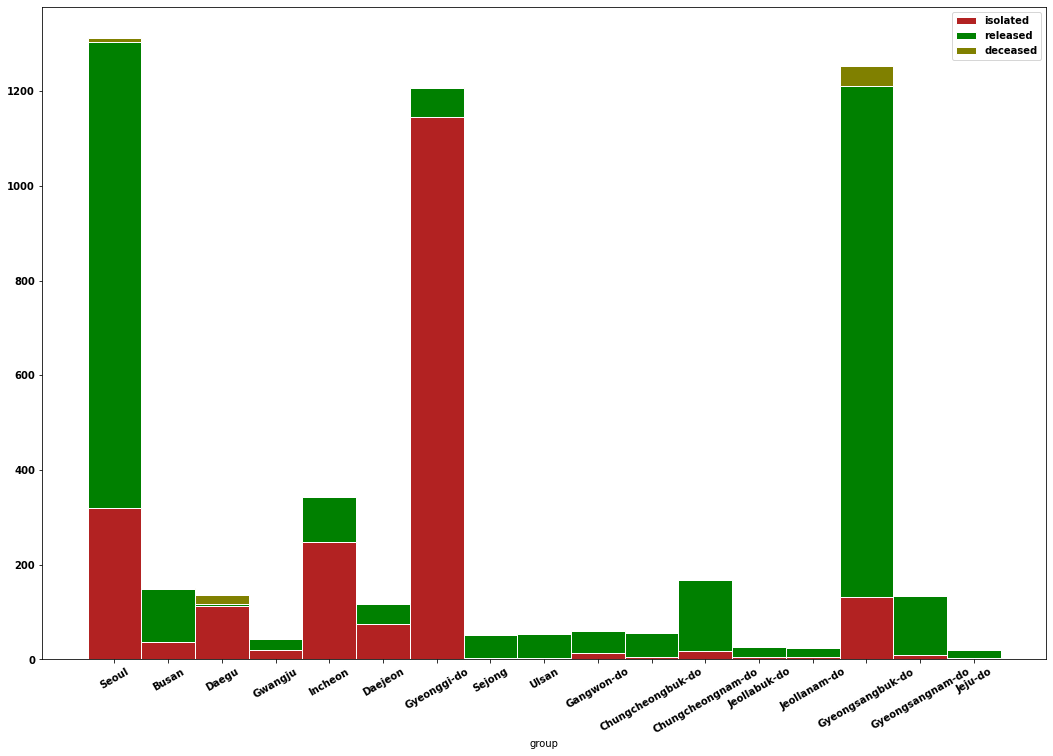

In [ ]:
from matplotlib import rc
 
isolated=[]
deceased=[]
released=[]
for i in provv:
    isolated.append(len(p_info[(p_info.province==i)&(p_info.state=='isolated')]))
    deceased.append(len(p_info[(p_info.province==i)&(p_info.state=='deceased')]))
    released.append(len(p_info[(p_info.province==i)&(p_info.state=='released')]))    
    
f, ax = plt.subplots(figsize=(18,12))  
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = isolated
bars2 = released
bars3 = deceased
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
 
# Names of group and bar width
names = provv
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='firebrick', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='green', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='olive', edgecolor='white', width=barWidth)

#for p in ax.patches:
#             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
#                 textcoords='offset points')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold',rotation=30)
plt.xlabel("group")
plt.legend(['isolated','released','deceased'])
# Show graphic
plt.show()


In [ ]:
#non visualizza gli angoli il grafico
#indice di mortalità
p_info['age_death']=0
for i in ages.index:
    p_info.age_death[(p_info.age==i)]=round(100*len(p_info.age_death[(p_info.age==i)&(p_info.state=='deceased')])/len(p_info.age_death[(p_info.age==i)]),2)
p_info["age_death"]=p_info["age_death"].astype(str)
p_info["age_death"]=p_info["age_death"]+'%'

mort=[]
et=[]
eta=ages.index.tolist()
eta.sort()
for i in eta:
    mort.append(p_info.age_death[p_info.age==i].unique()[0])
    et.append(i)
    
fig = px.line_polar(r=et, theta=mort, line_close=True)
fig.update_traces(fill='toself')
fig.show()

## Region

In [ ]:
regional_patient = pd.merge(p_info[['confirmed_date','sex','age','province','city']],
                            region[['province','city','latitude','longitude']], 
                            how = 'inner', on = ['province','city'])
display(regional_patient.head())

confirmed_date     sex  age province        city   latitude   longitude
0     2020-01-23    male   50    Seoul  Gangseo-gu  37.551166  126.849506
1     2020-02-23    male   50    Seoul  Gangseo-gu  37.551166  126.849506
2     2020-03-06    male   30    Seoul  Gangseo-gu  37.551166  126.849506
3     2020-03-09  female   40    Seoul  Gangseo-gu  37.551166  126.849506
4     2020-03-09  female   60    Seoul  Gangseo-gu  37.551166  126.849506

In [ ]:
regional_count = regional_patient[['latitude','longitude']]

### Visualizzazione regional_data



> regional_data = [[[row['Latitude'],row['Longitude']] for index, row in regional_count[heat_df['Weight'] == i].iterrows() for i in range(0,13)]] 

   
**Riscrivendo la lista in maniera estesa avremo:**
> regional_data1 = []

> for i in range(0,13):

>     regional data2 = []

>     regional_data1.append(regional_data2)

>     for index, row regional_count[regional_count['city'] == i].iterrows():

>         lt_lon = [row['Latitude'],row['Longitude']]

>         regional_data2.append(lat_lon)

Nel seguente grafico andremo a visualizzare le località con maggiore presenza di contagi:

In [ ]:
map_korea = folium.Map([36, 128], zoom_start=7) 

# Filter the DF for rows, then columns
regional_count = regional_patient[['latitude','longitude']]

# List comprehension to make out list of lists
regional_data = [[row['latitude'],row['longitude']] for index, row in regional_count.iterrows()]

# Plot maker
MarkerCluster(regional_data).add_to(map_korea) # Layer 1 : numero visualizzato

# Plot Heat it on the map
HeatMap(regional_data).add_to(map_korea) #Layer 2 : heatmap

# Display the map
map_korea

In questo secondo grafico andremo a visualizzare il numero di contagi maschili e femminili attraverso due heatmap differenti:

In [ ]:
male_patient = regional_patient[regional_patient.sex == 'male'][['latitude','longitude']].dropna() 
#prendiamo solo le righe in "sex" con stritto 'male'

female_patient = regional_patient[regional_patient.sex == 'female'][['latitude','longitude']].dropna()


m = folium.Map([36, 128], zoom_start=7) #creo la mappa 

initial = folium.plugins.MarkerCluster(control=False) # filtro sullo stesso livello della mappa

m.add_child(initial)

female_g = plugins.FeatureGroupSubGroup(initial, 'Female')
m.add_child(female_g)

male_g = plugins.FeatureGroupSubGroup(initial, 'Male') 
m.add_child(male_g)

female_data = [[row['latitude'],row['longitude']] for index, row in female_patient.iterrows()]

male_data = [[row['latitude'],row['longitude']] for index, row in male_patient.iterrows()]

MarkerCluster(female_data).add_to(female_g)

MarkerCluster(male_data).add_to(male_g)

# Plot Heat it on the map
HeatMap(female_data).add_to(female_g) #Layer 2

# Plot Heat it on the map
HeatMap(male_data,gradient={.4: 'purple', .65: 'orange', 1: 'lime'}).add_to(male_g) #Layer 2

folium.LayerControl(collapsed=False).add_to(m)

m

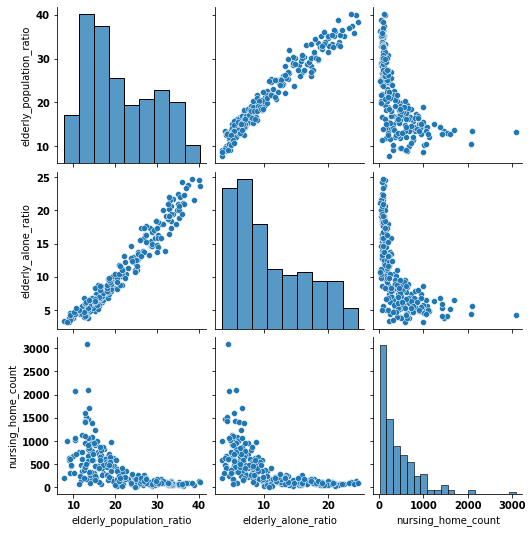

In [ ]:
#non sono significative le colonne e righe relative a nursing_home_count perchè non abbiamo un modo 
#per calcolare il numero di abitanti di ogni città
region_drop=region[(region.province==region.city) & (region.province!= 'Jeju-do') & (region.province!= 'Sejong')]
region.drop(region_drop.index.tolist(), inplace=True)

sns.pairplot(region[["elderly_population_ratio","elderly_alone_ratio","nursing_home_count"]]) 

In [ ]:
trend_time = pd.merge(search[['cold','flu','pneumonia','coronavirus','date']],
                            time[['date','test','confirmed','deceased']], 
                            how = 'inner', on = ['date'])
display(trend_time.head())

cold      flu  pneumonia  ...  test confirmed  deceased
0  0.19217  0.70343    3.63716  ...     1         1         0
1  0.22462  0.59789    4.31987  ...     1         1         0
2  0.23808  0.56661    3.66416  ...     4         1         0
3  0.30308  0.55625    3.18035  ...    22         1         0
4  0.34689  0.40226    2.48156  ...    27         2         0

[5 rows x 8 columns]

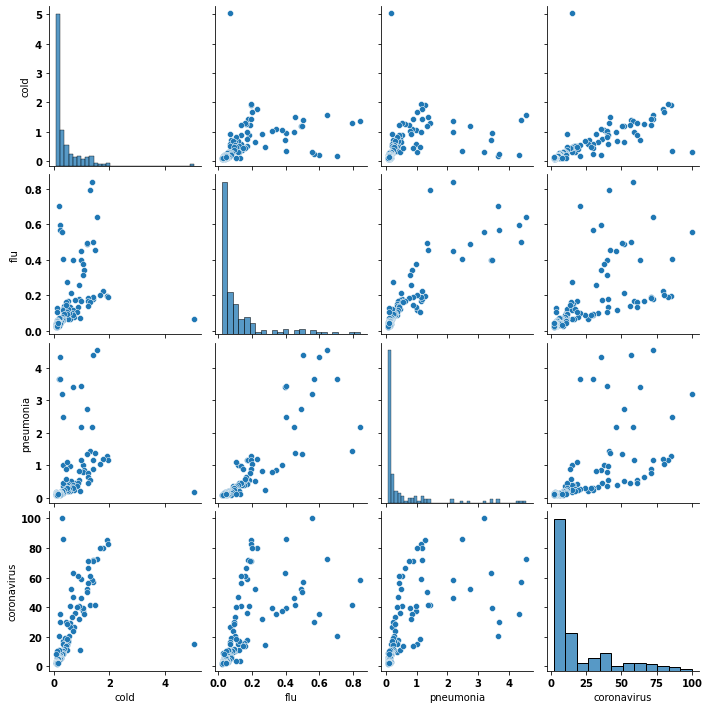

In [ ]:
sns.pairplot(trend_time[['cold','flu','pneumonia','coronavirus']]) 

In [ ]:
trend_time["test_g"]=1
trend_time["confirmed_g"]=1
trend_time["deceased_g"]=0
for i in trend_time.index:
    if i!=0:
        trend_time["test_g"].loc[i]=trend_time["test"].loc[i]-trend_time["test"].loc[i-1]
        trend_time["confirmed_g"].loc[i]=trend_time["confirmed"].loc[i]-trend_time["confirmed"].loc[i-1]
        trend_time["deceased_g"].loc[i]=trend_time["deceased"].loc[i]-trend_time["deceased"].loc[i-1]


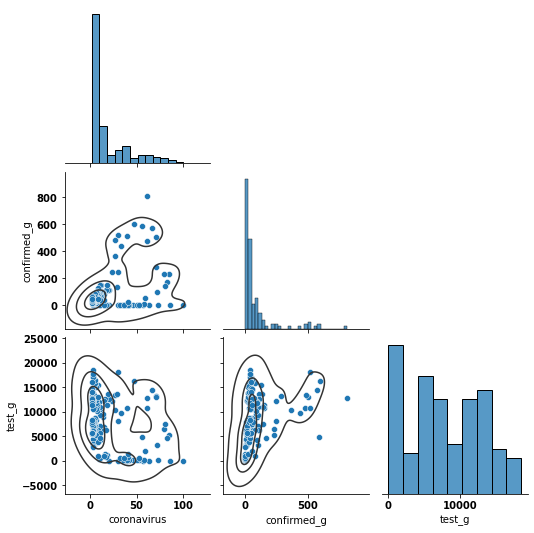

In [ ]:
g=sns.pairplot(trend_time[['coronavirus','confirmed_g','test_g']],corner=True) 
g.map_lower(sns.kdeplot, levels=4, color=".2")

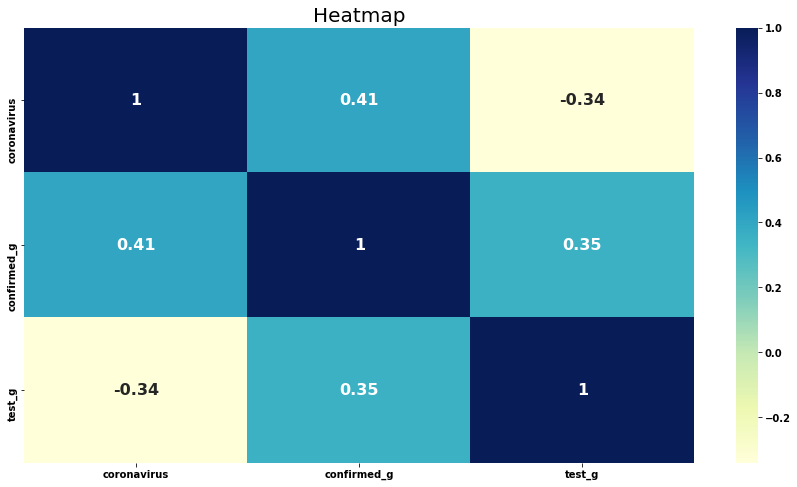

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(trend_time[['coronavirus','confirmed_g','test_g']].corr(), cmap = 'YlGnBu', annot = True, annot_kws={"fontsize": 16}) 
plt.title('Heatmap', fontsize = 20)
plt.show()

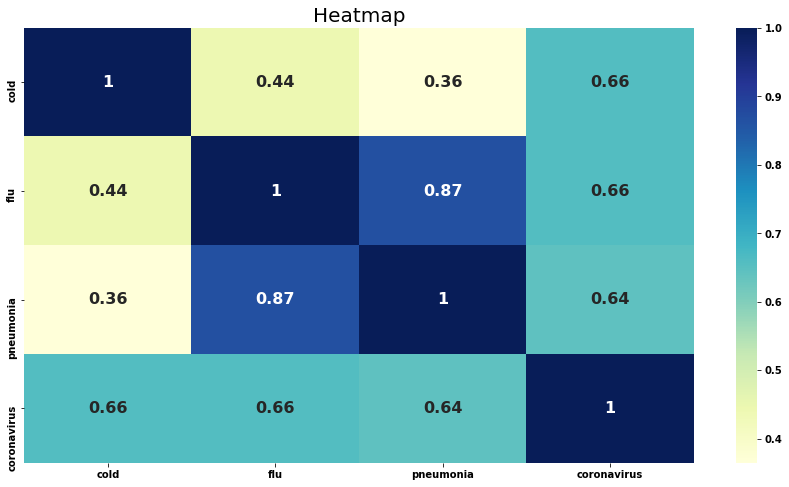

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(trend_time[['cold','flu','pneumonia','coronavirus']].corr(), cmap = 'YlGnBu', annot = True, annot_kws={"fontsize": 16}) 
plt.title('Heatmap', fontsize = 20)
plt.show()

## Politica
> Analizziamo ora quali sono state le varie politiche da parte della Sud Corea per fronteggiare l'avanzata del virus. In particolare realizzeremo un diagramma di Gantt per vedere come sono evoluta nel tempo le varie misure.

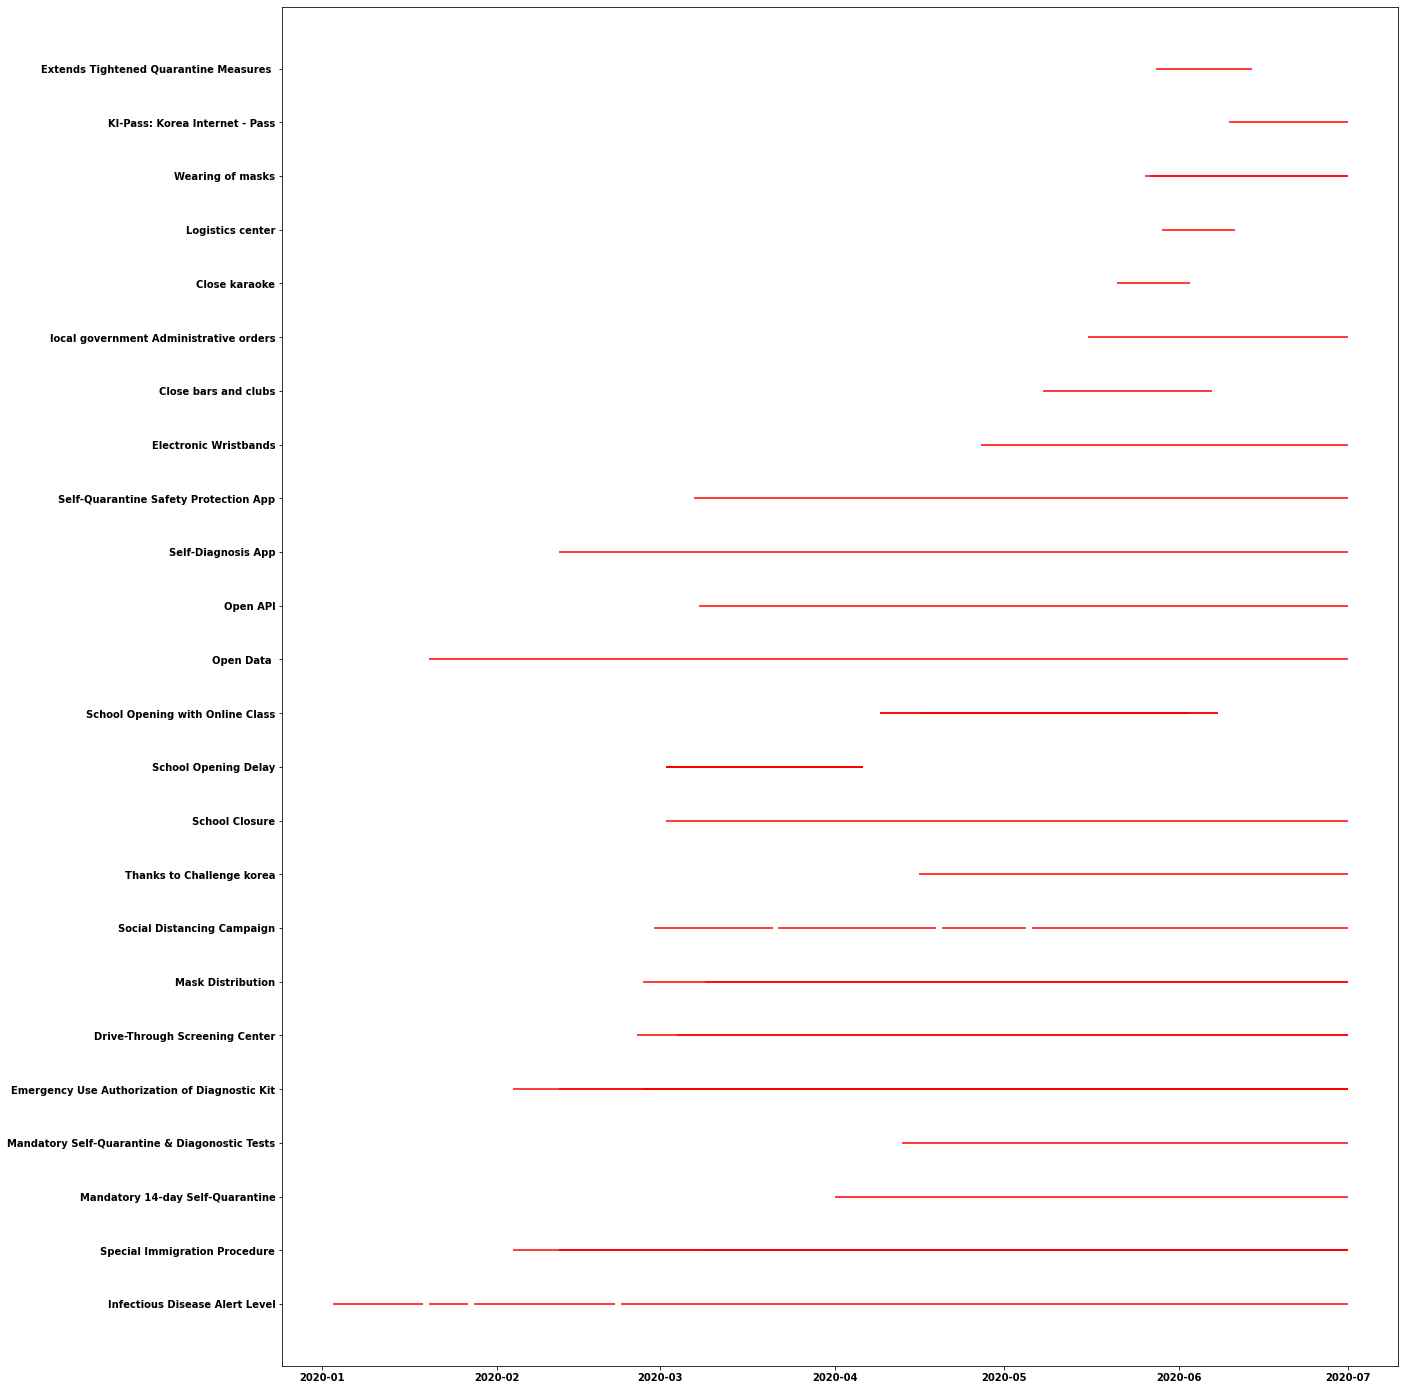

In [ ]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot()
ax = ax.xaxis_date()
ax = plt.hlines(policy.gov_policy,policy.start_date,policy.end_date, color='r')

In [ ]:
policy_gantt1 = policy.drop(['country','type'],axis=1)
policy_gantt1.columns=['Task','Detail','Start','Finish'] 
policy_gantt= policy_gantt1.to_dict('records')

fig_gantt = ff.create_gantt(policy_gantt, group_tasks=True, height = 1000, width = 2000)
fig_gantt.show()

Qui possiamo vedere gli effetti che ha avuto il primo provvedimento sul **distanziamento sociale** a partire dal 28-02-2020 e del secondo provvedimento avvenuto il 22-03-20.

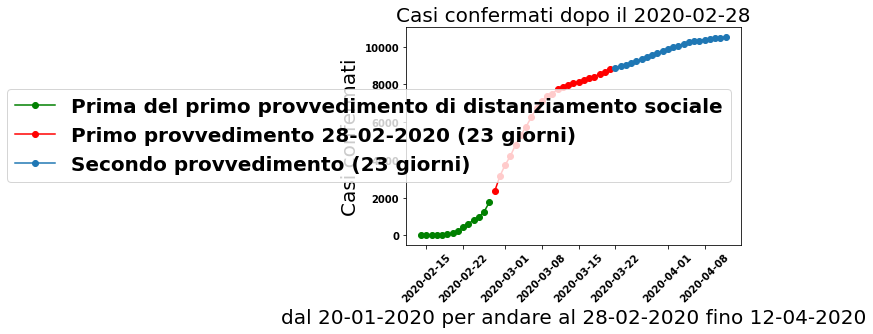

In [ ]:
date = time['date'] 
conNum = time['confirmed'] 
plt.figure()
plt.rcParams['figure.figsize'] = [30, 10]

xbefore=date[25:39] #23 giorni a partire dal 20-01-2020
ybefore=conNum[25:39] 
plt.plot(xbefore, ybefore, marker='o', color='g', label='Prima del primo provvedimento di distanziamento sociale')

xafter1=date[39:62] #23 giorni a partire dal 28-02-2020
yafter1=conNum[39:62] 
plt.plot(xafter1, yafter1, marker='o', color='r', label='Primo provvedimento 28-02-2020 (23 giorni)')


xafter2=date[62:84] #23 giorni dopo l'inizio del primo lockdown
yafter2=conNum[62:84] 
plt.plot(xafter2, yafter2, marker='o', label='Secondo provvedimento (23 giorni)')

plt.xticks(rotation=45)
plt.xlabel("dal 20-01-2020 per andare al 28-02-2020 fino 12-04-2020", fontsize = 20)
plt.ylabel("Casi confermati", fontsize = 20)
plt.title("Casi confermati dopo il 2020-02-28", fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

In [ ]:
p_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sex                 4043 non-null   object        
 1   age                 5165 non-null   int64         
 2   country             5165 non-null   object        
 3   province            5165 non-null   object        
 4   city                5165 non-null   object        
 5   infection_case      5165 non-null   object        
 6   infected_by         5165 non-null   object        
 7   symptom_onset_date  689 non-null    datetime64[ns]
 8   confirmed_date      5165 non-null   datetime64[ns]
 9   released_date       2937 non-null   datetime64[ns]
 10  deceased_date       78 non-null     datetime64[ns]
 11  state               5165 non-null   object        
 12  sex_age             4043 non-null   object        
 13  freq_age            5165 non-null

## Floating Population
- Confronteremo  **17 gennaio (venerdì)** prima del primo focolaio e **31 gennaio (venerdì)**.

### Grafico 1: variazioni della popolazione fluttuante per fascia di età

### Grafico 2: differenze nella variazione della popolazione attuale per fascia di età per due date
     - Prima dello scoppio: dopo lo scoppio, sono stati estratti i valori.
     - Se il valore è positivo, la popolazione fluttuante si è contratta. Se il valore è negativo, molte persone vanno in giro nonostante la corona.

In [ ]:
def distribuzione_movimenti(date1, date2, city):
    
    if city == 'tutti i distretti di Seoul':        
        # seleziono tutte le righe con quella data
        date_1 = floating[(floating['date'] == pd.to_datetime(date1))] 
        date_2 = floating[(floating['date'] == pd.to_datetime(date2))]
    else:
        # tutte le righe con quella data e città
        date_1 = floating[(floating['date'] == date1) & (floating['city'] == city)] 
        date_2 = floating[(floating['date'] == date2) & (floating['city'] == city)]

    # per ogni ora e per ogni fascia di età vado a fare la somma del numero di persone che fluttuano in Seoul
    
    date_1 = pd.DataFrame(date_1.groupby(['hour', 'birth_year'])['fp_num'].sum()) 
    date_1.reset_index(inplace = True) #faccio il reset dell'indice

    date_2 = pd.DataFrame(date_2.groupby(['hour', 'birth_year'])['fp_num'].sum())
    date_2.reset_index(inplace = True)

    fig, ax = plt.subplots(1,2, figsize = (18,8),  gridspec_kw={'wspace': 0.2})
    
    # le parentesi graffe sono riempite con il valore di city attraverso la .format

    fig.suptitle('{} : Come cambiano le persone in movimento in base alla fascia di età e orario'.format(city), fontsize = 18) 
    fig.subplots_adjust(left=0.001, bottom=0.06, right=1.05, wspace=0.05)

    #creo il plot mettendo come x le ore , y le fascie di età e c il valore dei vari punti, mentre con s setto la grandezza del punto, cmap il colore
    
    t = ax[0].scatter(x=date_1['hour'], y=date_1['birth_year'], c=date_1['fp_num'], s= 200, cmap=plt.cm.RdYlBu_r)
    ax[0].set_title("{}".format(date1), fontsize=15)
    ax[0].set_xlabel('hour', fontsize=13)
    ax[0].set_ylabel('birth_year', fontsize=13)    
    cbar0  =plt.colorbar(t, ax = ax[0])
    cbar0.set_label('fp_num', fontsize=13)

    t2 = ax[1].scatter(x=date_2['hour'], y=date_2['birth_year'], c=date_2['fp_num'], s= 200, cmap=plt.cm.RdYlBu_r)
    ax[1].set_title("{}".format(date2), fontsize=15)
    ax[1].set_xlabel('hour', fontsize=13)
    ax[1].set_ylabel('birth_year', fontsize=13)    
    cbar1  = plt.colorbar(t2, ax = ax[1])
    cbar1.set_label('fp_num', fontsize=13)        
    plt.show()

In [ ]:
def distribuzione_movimenti_diff(date1, date2, city):
    
    if city == 'tutti i distretti di Seoul':    
        # seleziono tutte le righe con quella data    
        date_1 = floating[(floating['date'] == pd.to_datetime(date1))]
        date_2 = floating[(floating['date'] == pd.to_datetime(date2))]
    else:
        # tutte le righe con quella data e città
        date_1 = floating[(floating['date'] == pd.to_datetime(date1)) & (floating['city'] == city)]
        date_2 = floating[(floating['date'] == pd.to_datetime(date2)) & (floating['city'] == city)]

    # per ogni ora vado a fare la somma del numero di persone che fluttuano in Seoul

    date_1_no_groupby = pd.DataFrame(date_1.groupby(['hour'])['fp_num'].sum())
    date_1_no_groupby.reset_index(inplace = True)

    date_2_no_groupby = pd.DataFrame(date_2.groupby(['hour'])['fp_num'].sum())
    date_2_no_groupby.reset_index(inplace = True)
    
     # per ogni ora e per ogni fascia di età vado a fare la somma del numero di persone che fluttuano in Seoul

    date_1_groupby = pd.DataFrame(date_1.groupby(['hour', 'birth_year'])['fp_num'].sum())
    date_1_groupby.reset_index(inplace = True)

    date_2_groupby = pd.DataFrame(date_2.groupby(['hour', 'birth_year'])['fp_num'].sum())
    date_2_groupby.reset_index(inplace = True)
    
    fp_num_diff = date_1_groupby.iloc[:,-1:] -  date_2_groupby.iloc[:,-1:] #seleziono tutte le righe e l'ultima colonna "-1:"
    ora_eta = date_1_groupby.iloc[:,:-1] # prendo tutte tranne l'ultima colonna
    df = pd.concat([ora_eta, fp_num_diff ], axis = 1) # concateno il dataframe ora_eta con la serie fp_num_diff
        
    fig, ax = plt.subplots(1,2, figsize = (18,8),  gridspec_kw={'wspace': 0.2, 'hspace': 0.4})
    # le parentesi graffe sono riempite con il valore di city attraverso la .format
    fig.suptitle('{} : Differenza tra prima del covid e dopo il covid'.format(city), fontsize = 18)
    fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, wspace=0.05)

    # creo il plot mettendo come x le ore , y le fascie di età e c il valore dei vari punti, 
    # mentre con s setto la grandezza del punto, cmap il colore
    
    t = ax[0].scatter(x=df['hour'], y=df['birth_year'], c=df['fp_num'], s= 200, cmap=plt.cm.RdYlBu_r, vmax =7000)
    ax[0].set_title("{} -- {} differenza tra le due date, divise per ora e età".format(date1, date2), fontsize=15)
    ax[0].set_xlabel('hour', fontsize=13)
    ax[0].set_ylabel('birth_year', fontsize=13)    
    cbar1 = plt.colorbar(t, ax = ax[0])
    cbar1.set_label('fp_num', fontsize=13)

    #plot lineare della somma delle persone che fluttuano per i distretti di Seoul raggruppati per ora
    
    sns.lineplot(data=date_1_no_groupby, x='hour', y='fp_num', color='green', ax=ax[1]).set_title('fp_num', fontsize=16)
    sns.lineplot(data=date_2_no_groupby, x='hour', y='fp_num', color='purple', ax=ax[1]).set_title('fp_num', fontsize=16)
    ax[1].set_title("spostamenti delle persone nelle date {} e {}".format(date1, date2), fontsize=15)
    ax[1].set_xlabel('hour', fontsize=13)
    ax[1].set_ylabel('total fp_num', fontsize=13)    
    ax[1].legend([date1, date2])
    plt.show()
    

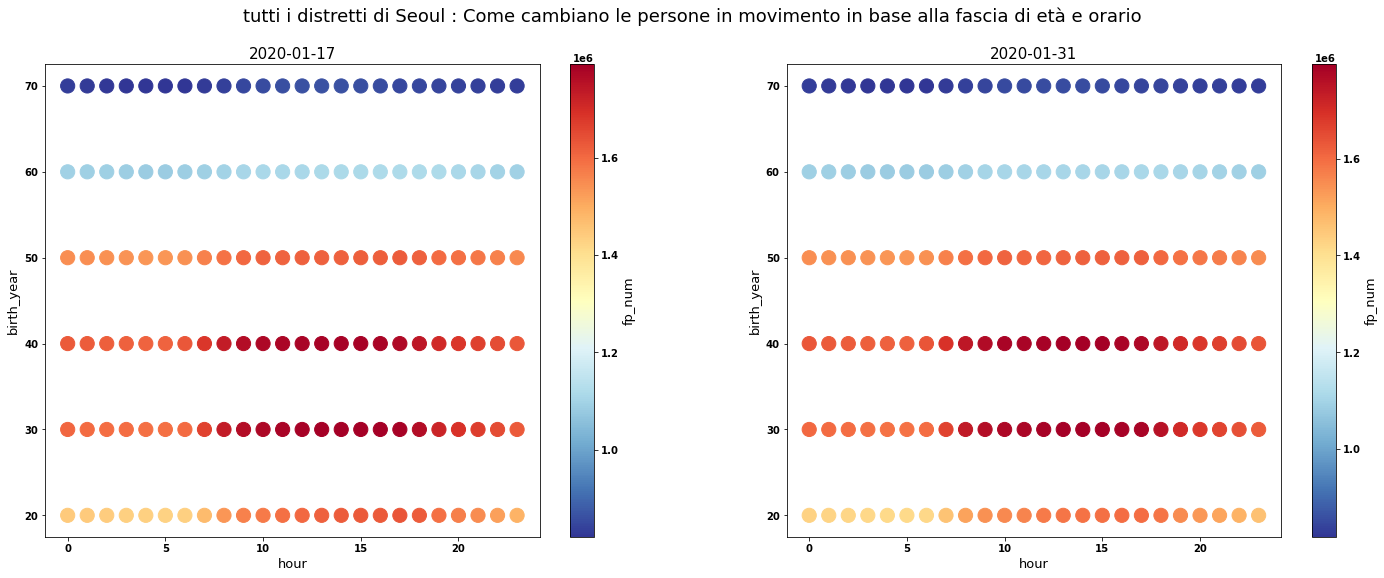

In [ ]:
distribuzione_movimenti('2020-01-17', '2020-01-31', 'tutti i distretti di Seoul')

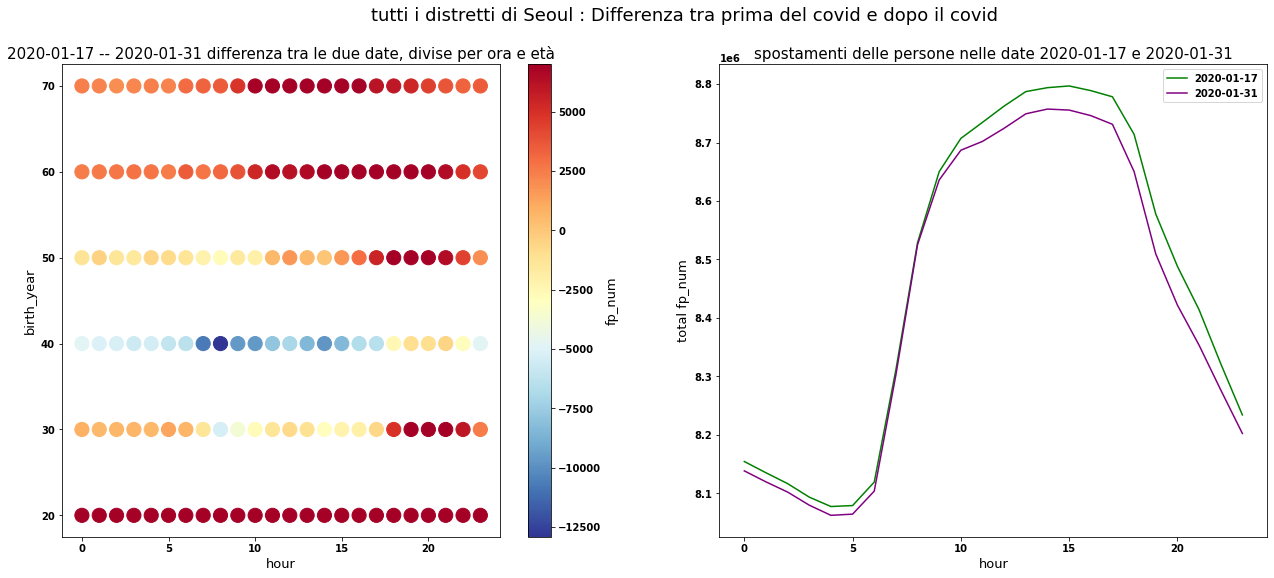

In [ ]:
distribuzione_movimenti_diff('2020-01-17', '2020-01-31', 'tutti i distretti di Seoul')

> Andiamo a vedere l'andamento della popolazione che circolava nella città di Seoul prima del virus nel **2020-01-17** e dopo il primo provvedimento di distanziamento sociale avvenuto il **2020-03-01**.

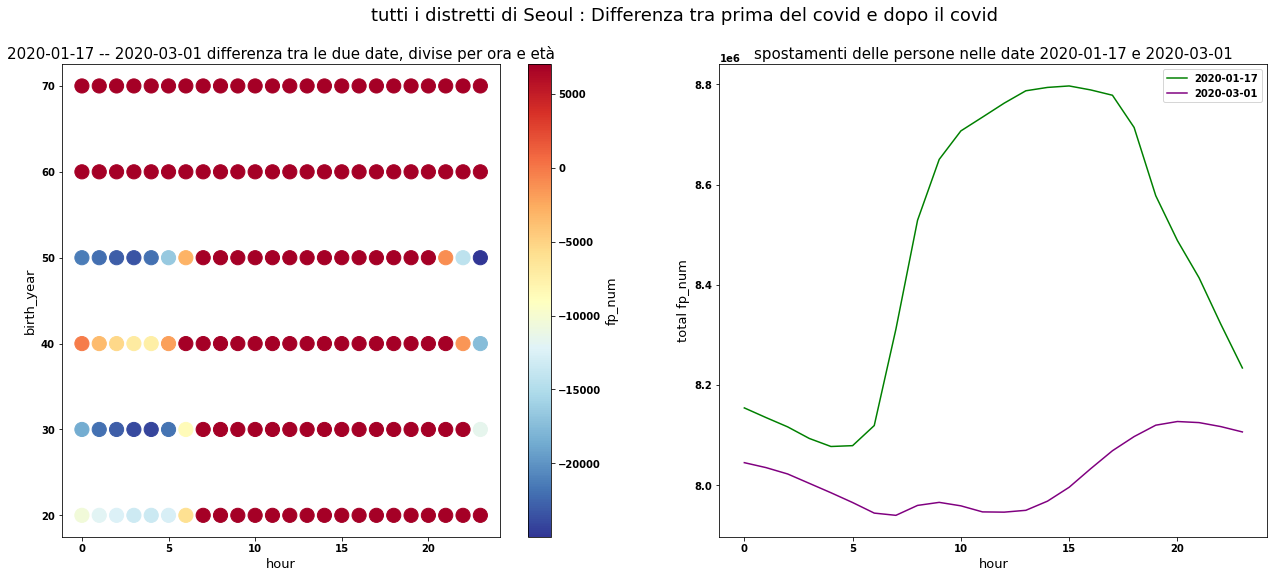

In [ ]:
distribuzione_movimenti_diff('2020-01-17', '2020-03-01', 'tutti i distretti di Seoul')

In [ ]:
floating_ragg=floating.groupby(by='date',as_index=False).sum()
floating_ragg.drop(['hour','birth_year'], axis=1, inplace=True)
time_seoul= t_province[t_province.province=='Seoul']
time_seoul.drop(['time','province'], axis=1, inplace=True)

time_seoul["confirmed_g"]=0
time_seoul["released_g"]=0
time_seoul["deceased_g"]=0
for i in time_seoul.index:
    if i!=0:
        time_seoul["confirmed_g"].loc[i]=time_seoul["confirmed"].loc[i]-time_seoul["confirmed"].loc[i-17]
        time_seoul["released_g"].loc[i]=time_seoul["released"].loc[i]-time_seoul["released"].loc[i-17]
        time_seoul["deceased_g"].loc[i]=time_seoul["deceased"].loc[i]-time_seoul["deceased"].loc[i-17]
time_seoul.drop(['confirmed','released','deceased'], axis=1, inplace=True)
time_seoul.info()
time_seoul.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 2754
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         163 non-null    datetime64[ns]
 1   confirmed_g  163 non-null    int64         
 2   released_g   163 non-null    int64         
 3   deceased_g   163 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 11.4 KB


date  confirmed_g  released_g  deceased_g
2686 2020-06-26           17          82           0
2703 2020-06-27           17          68           0
2720 2020-06-28           14          12           0
2737 2020-06-29            7          19           0
2754 2020-06-30            7          43           0

In [ ]:
seoul_info = pd.merge(floating_ragg,
                            time_seoul, 
                            how = 'inner', on = ['date'])
seoul_info.head()

date     fp_num  confirmed_g  released_g  deceased_g
0 2020-01-20  203217220            0           0           0
1 2020-01-21  203095360            0           0           0
2 2020-01-22  202391580            0           0           0
3 2020-01-23  196953190            0           0           0
4 2020-01-24  176114510            0           0           0

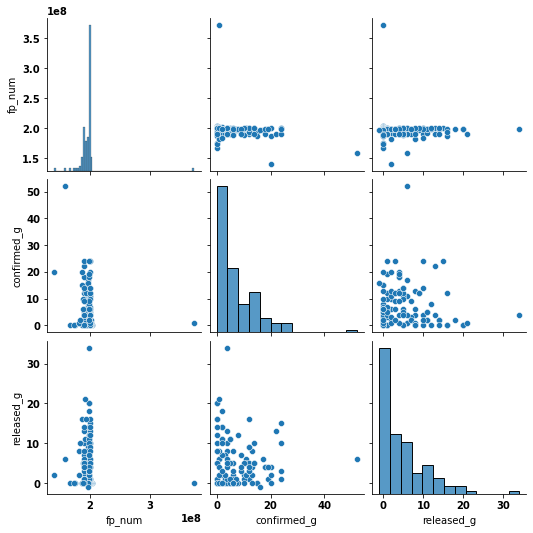

In [ ]:
sns.pairplot(seoul_info.drop(['deceased_g'], axis=1)) 

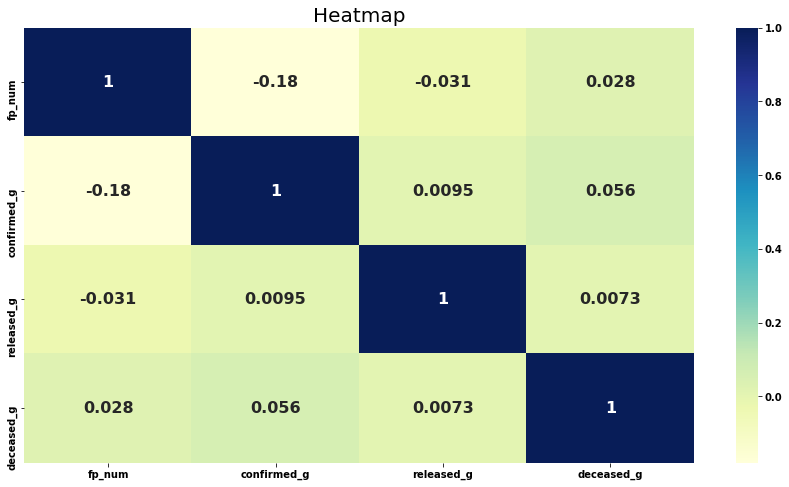

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(seoul_info.corr(), cmap = 'YlGnBu', annot = True, annot_kws={"fontsize": 16}) 
plt.title('Heatmap', fontsize = 20)
plt.show()

# 4.Clustering

Prendiamo come x (variabile di interesse) i valori di influenza e di coronavirus all` interno della "search trend"

In [ ]:
# take only annual income and spending score
x = trend_time[['flu','coronavirus']].values

# let's check the shape of x
print(x.shape)

(162, 2)


Inanzitutto attraverso l'elbow method andiamo ad analizzare il numero di cluster da utilizzare

Text(0, 0.5, 'wcss')

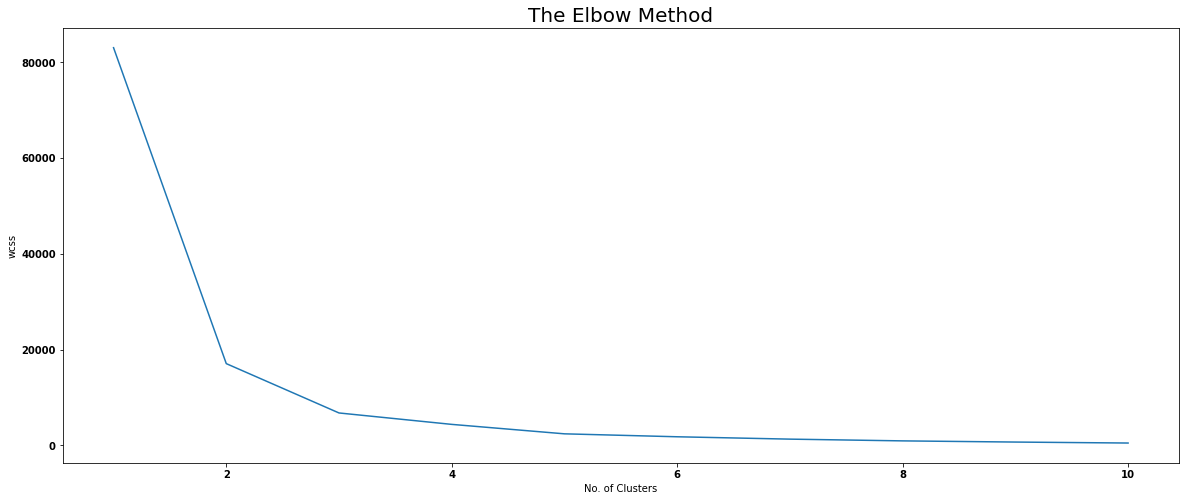

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

notiamo come il numero perfetto di cluster da andare ad usare è tre. Utilizziamo inizialmente come modello il Kmeans, dove dato che x è un array nx2, allora per ogni colore (indice i) prenderemo entrambe le colonne (indice j):

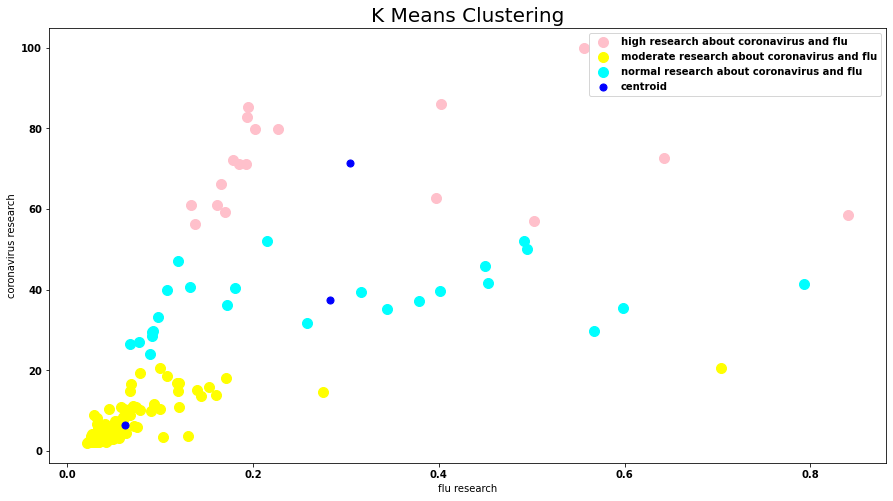

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'high research about coronavirus and flu')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'moderate research about coronavirus and flu')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'normal research about coronavirus and flu')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('flu research')
plt.ylabel('coronavirus research')
plt.legend()
plt.show()

Un secondo tipo di clusterizzazione è quella agglomerativa, dove anche in questo caso il numero di cluster utilizzati è tre:

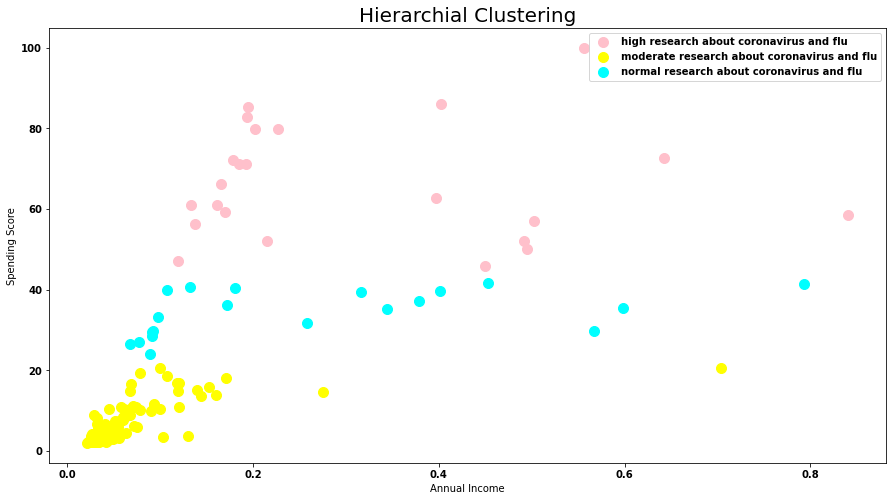

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'high research about coronavirus and flu')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'moderate research about coronavirus and flu')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'normal research about coronavirus and flu')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

A questo punto una seconda analisi può esser fatta sul variare del numero di infetti di coronavirus al variare del numero di test giornalieri

In [ ]:
# prendiamo test giornalieri e dati di coronavirus
x = trend_time[['test_g','coronavirus']].values

# let's check the shape of x
print(x.shape)

(162, 2)


Text(0, 0.5, 'wcss')

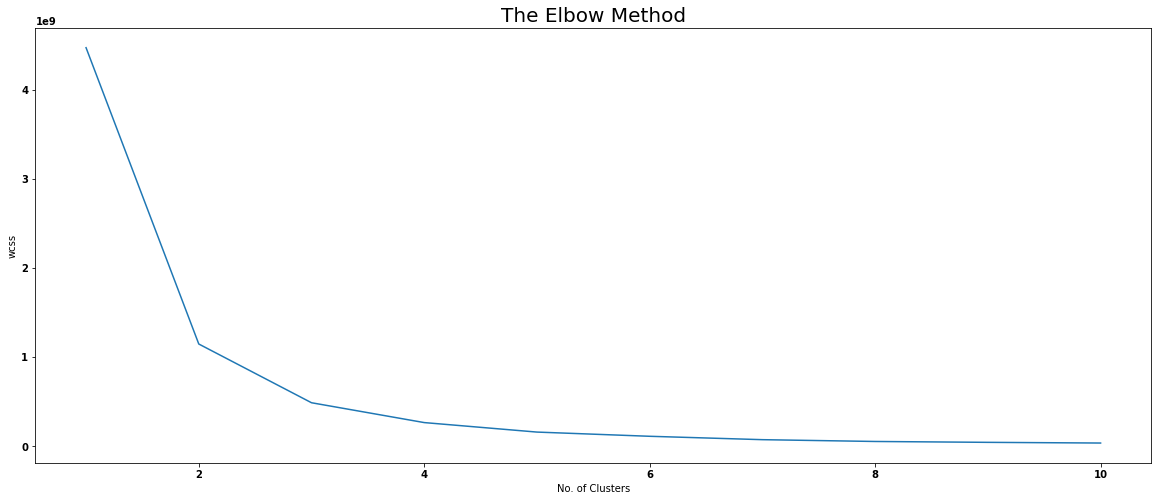

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

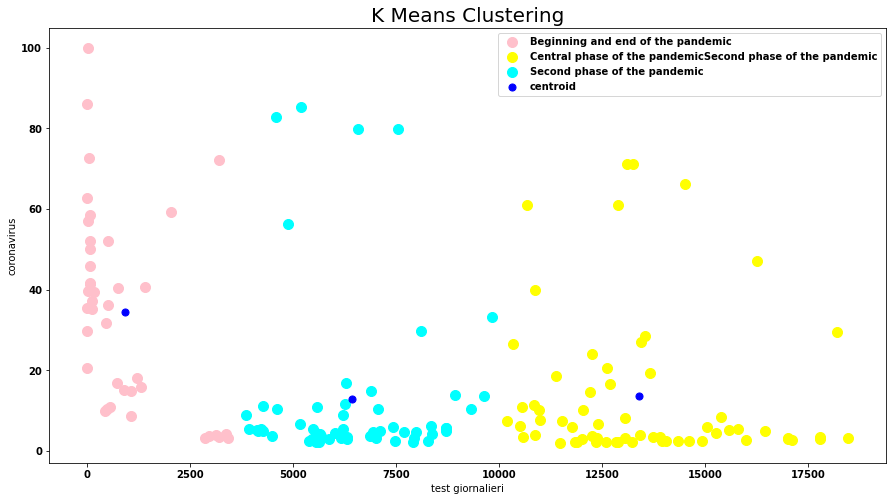

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Beginning and end of the pandemic ')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Central phase of the pandemicSecond phase of the pandemic')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Second phase of the pandemic')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('test giornalieri')
plt.ylabel('coronavirus')
plt.legend()
plt.show()

AttributeError: ignored

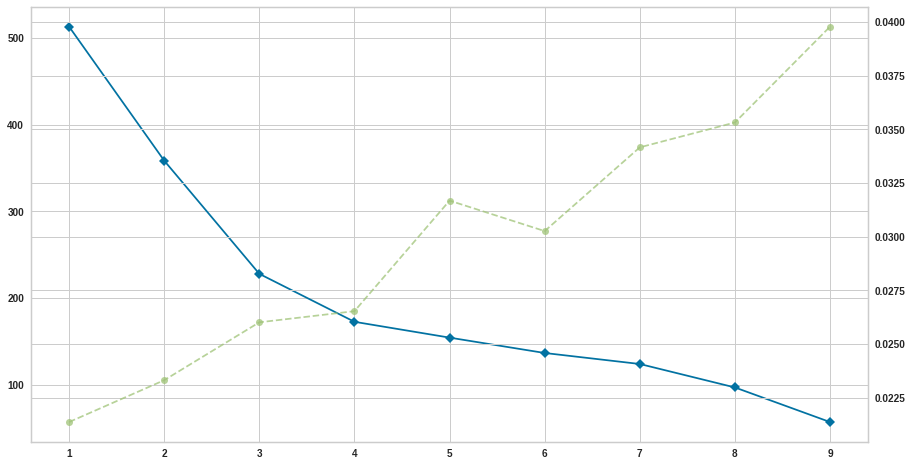

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

AttributeError: ignored

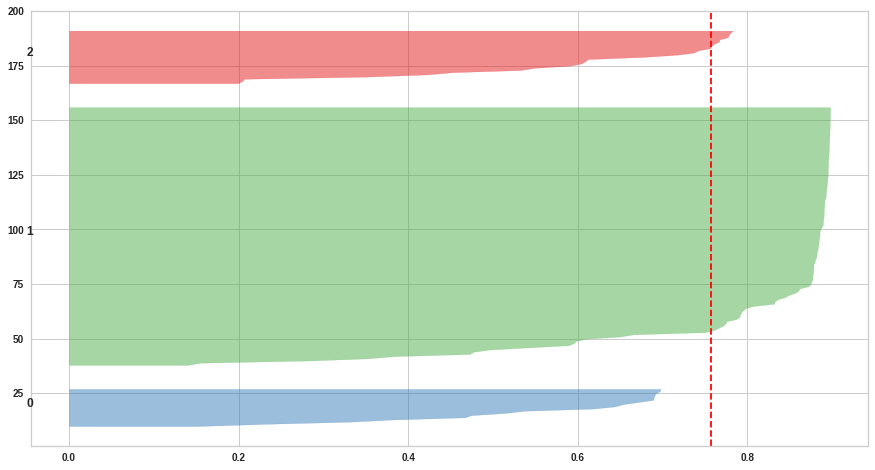

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Facciamo ora l'analisi con i dati di coronavirus confermati giornalieri:

In [ ]:
# prediamo i casi confermati giornalieri e i dati sul coronavirus
x = trend_time[['confirmed_g','coronavirus']].values

# let's check the shape of x
print(x.shape)

(162, 2)


Text(0, 0.5, 'wcss')

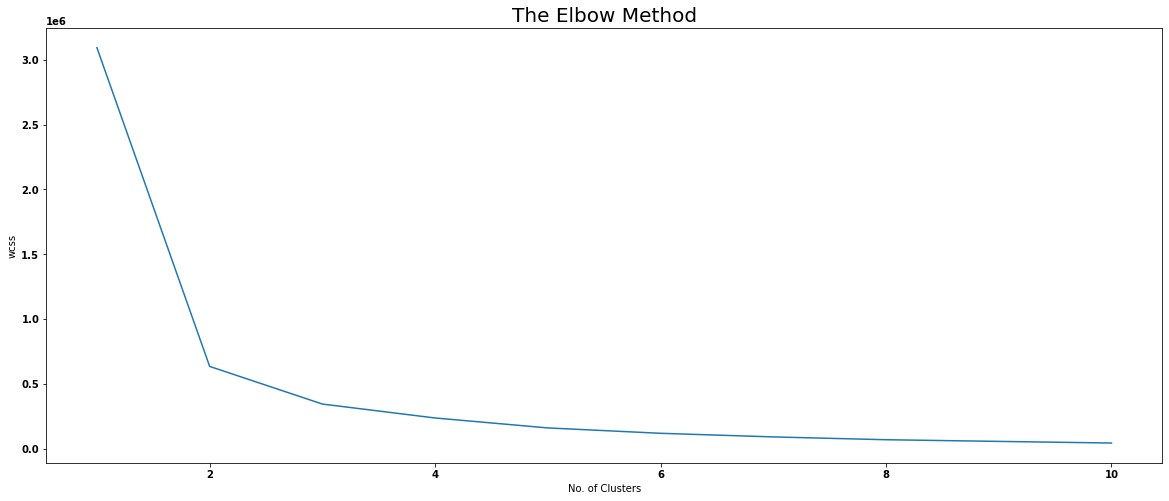

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

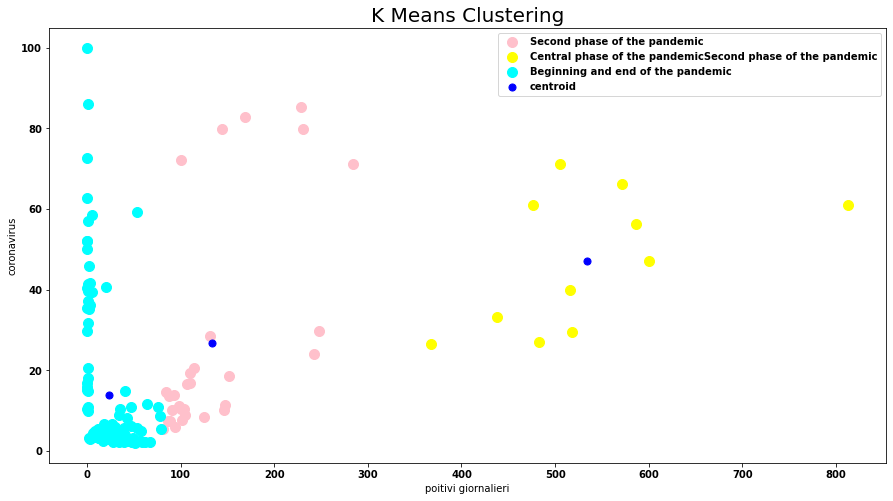

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Second phase of the pandemic')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Central phase of the pandemicSecond phase of the pandemic')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Beginning and end of the pandemic')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('poitivi giornalieri')
plt.ylabel('coronavirus')
plt.legend()
plt.show()

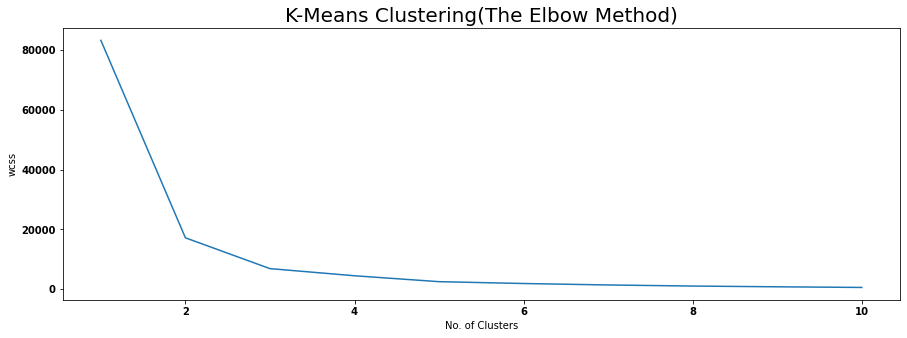

In [ ]:
from sklearn.cluster import KMeans

x = trend_time[['cold','flu','pneumonia','coronavirus']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Utilizziamo ora la PCA come cluster

In [ ]:
from sklearn.decomposition import PCA

pca_x = PCA(n_components=2, svd_solver="auto").fit_transform(x)

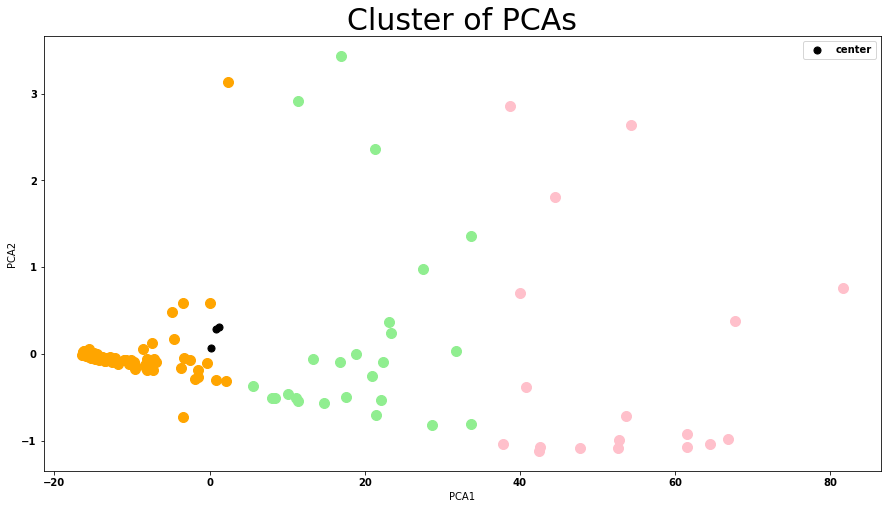

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
t_province["confirmed_g"]=0
t_province["confirmed_g"].loc[3]=1
t_province["released_g"]=0
t_province["deceased_g"]=0
for i in t_province.index:
    if i>17:
        t_province["confirmed_g"].loc[i]=t_province["confirmed"].loc[i]-t_province["confirmed"].loc[i-17]
        t_province["released_g"].loc[i]=t_province["released"].loc[i]-t_province["released"].loc[i-17]
        t_province["deceased_g"].loc[i]=t_province["deceased"].loc[i]-t_province["deceased"].loc[i-17]
t_province.drop(['confirmed','released','deceased'], axis=1, inplace=True)
t_province.info()
t_province.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2771 non-null   datetime64[ns]
 1   time         2771 non-null   int64         
 2   province     2771 non-null   object        
 3   confirmed_g  2771 non-null   int64         
 4   released_g   2771 non-null   int64         
 5   deceased_g   2771 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 130.0+ KB


date  time province  confirmed_g  released_g  deceased_g
0 2020-01-20    16    Seoul            0           0           0
1 2020-01-20    16    Busan            0           0           0
2 2020-01-20    16    Daegu            0           0           0
3 2020-01-20    16  Incheon            1           0           0
4 2020-01-20    16  Gwangju            0           0           0

In [ ]:
t_province_ragg=t_province.groupby(by='province',as_index=False).sum()
t_province_ragg.drop(['time'], axis=1, inplace=True)
t_province_ragg.head(17)

province  confirmed_g  released_g  deceased_g
0               Busan          154         142           3
1   Chungcheongbuk-do           65          60           0
2   Chungcheongnam-do          167         150           0
3               Daegu         6906        6700         189
4             Daejeon          117          44           1
5          Gangwon-do           65          54           3
6             Gwangju           44          32           0
7         Gyeonggi-do         1207         931          23
8    Gyeongsangbuk-do         1389        1328          54
9    Gyeongsangnam-do          134         128           0
10            Incheon          341         290           1
11            Jeju-do           19          16           0
12       Jeollabuk-do           27          21           0
13       Jeollanam-do           24          19           0
14             Sejong           50          47           0
15              Seoul         1312         985           7
16              Ulsan           55          50           1

In [ ]:
# prendiamo i casi giornalieri di corona virus e di morti giornalieri
x = t_province_ragg[['confirmed_g','deceased_g']].values

# let's check the shape of x
print(x.shape)

(17, 2)


Text(0, 0.5, 'wcss')

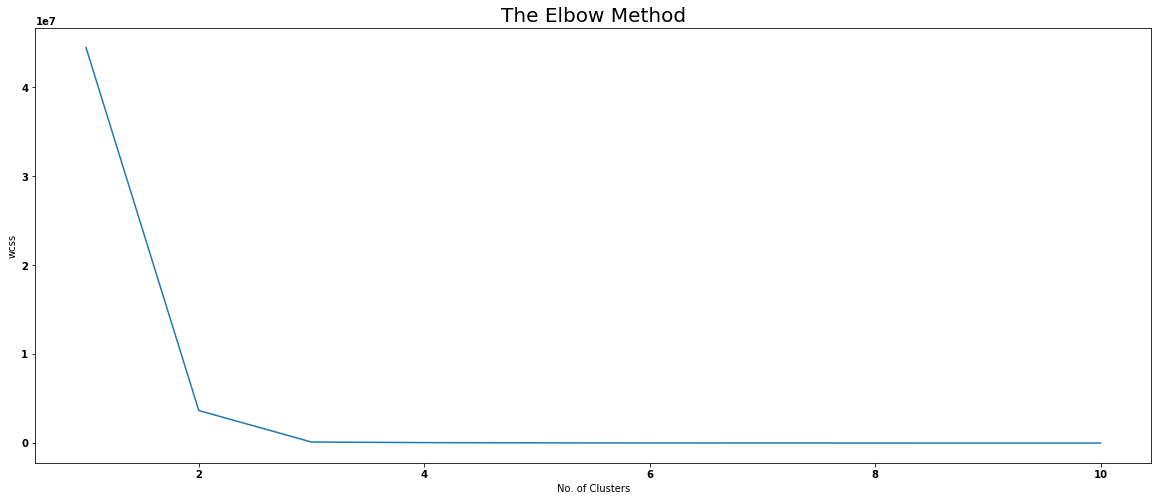

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

Andiamo a plottare le province che sono state più o meno colpite dal virus. Avendo solo 16 provincei punti che andiamo a visualizzare sono pochi e l'unica provincia con grande numero di morti 1e quella di seoul dove ci sono stati piu contagi

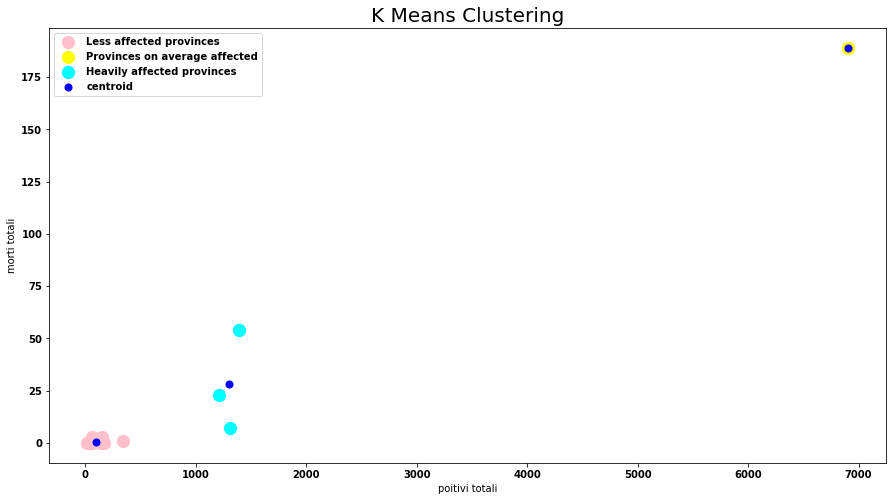

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 150, c = 'pink', label = 'Less affected provinces')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 150, c = 'yellow', label = 'Provinces on average affected')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 150, c = 'cyan', label = 'Heavily affected provinces')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('poitivi totali')
plt.ylabel('morti totali')
plt.legend()
plt.show()

Andiamo a studiare ora il caso nel quale usiamo la Nearest Neighbors

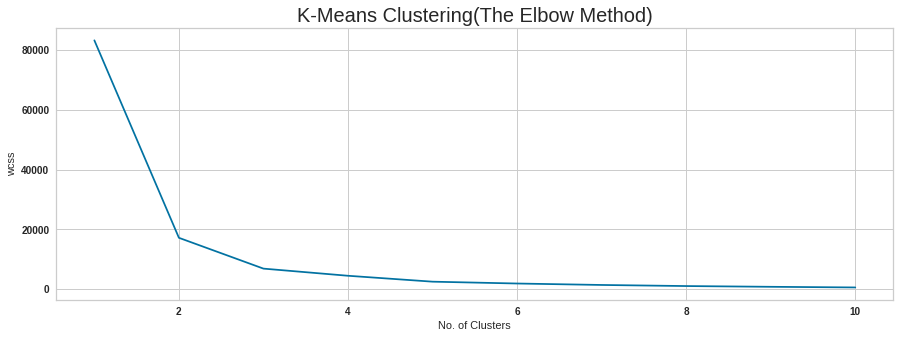

In [ ]:
from sklearn.cluster import KMeans

x = trend_time[['cold','flu','pneumonia','coronavirus']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca_x = PCA(n_components=2, svd_solver="auto").fit_transform(x)

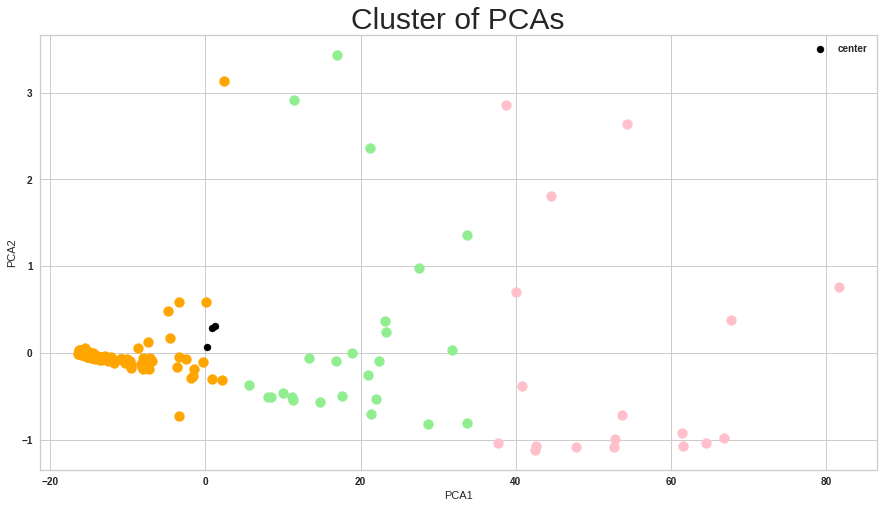

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

AttributeError: ignored

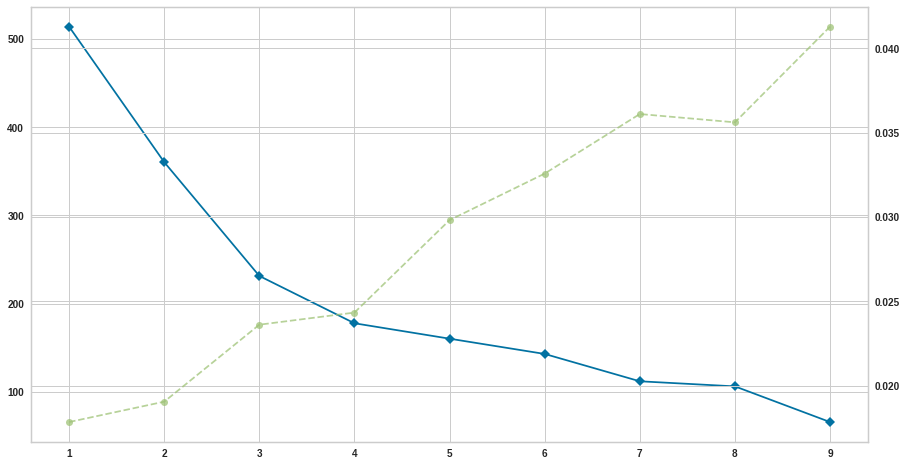

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

AttributeError: ignored

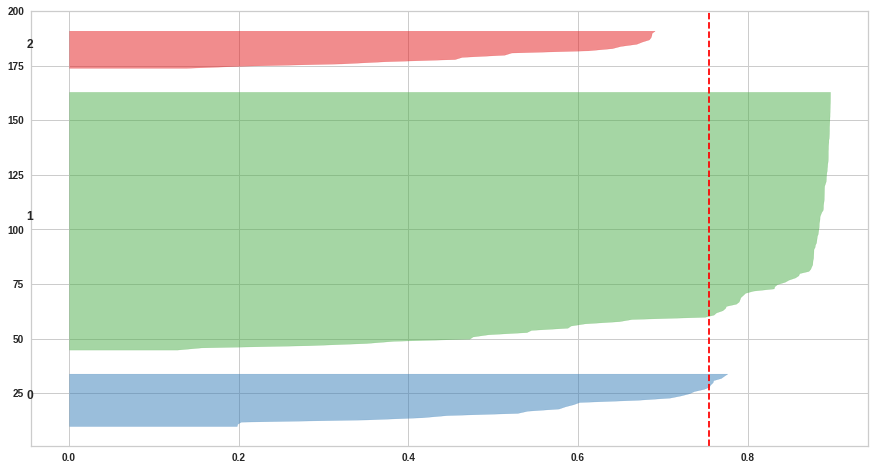

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
data_inizio_covid= pd.to_datetime('2020-01-20')
search['coronavirus_presence']=0 
for i in search.index:
    if search.date.loc[i]>=data_inizio_covid:
        search.coronavirus_presence.loc[i]=1
        
search['coronavirus_presence'] =search['coronavirus_presence'].astype(float)
search.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1642 non-null   datetime64[ns]
 1   cold                  1642 non-null   float64       
 2   flu                   1642 non-null   float64       
 3   pneumonia             1642 non-null   float64       
 4   coronavirus           1642 non-null   float64       
 5   coronavirus_presence  1642 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 77.1 KB


In [ ]:
# Class balance
search1=search.drop('date', axis=1)
co = search1[search1.coronavirus_presence== 1]
no_co = search1[search1.coronavirus_presence== 0]
print("CORONAVIRUS_PRESENCE: ", len(co), "CORONAVIRUS_ABSENCE", len(no_co))

CORONAVIRUS_PRESENCE:  162 CORONAVIRUS_ABSENCE 1480


In [ ]:
balanced_search = pd.concat([co, no_co.sample(len(co))])
x = balanced_search.iloc[:,:-1]
y = balanced_search.iloc[:,-1:]
balanced_search.shape

(324, 5)

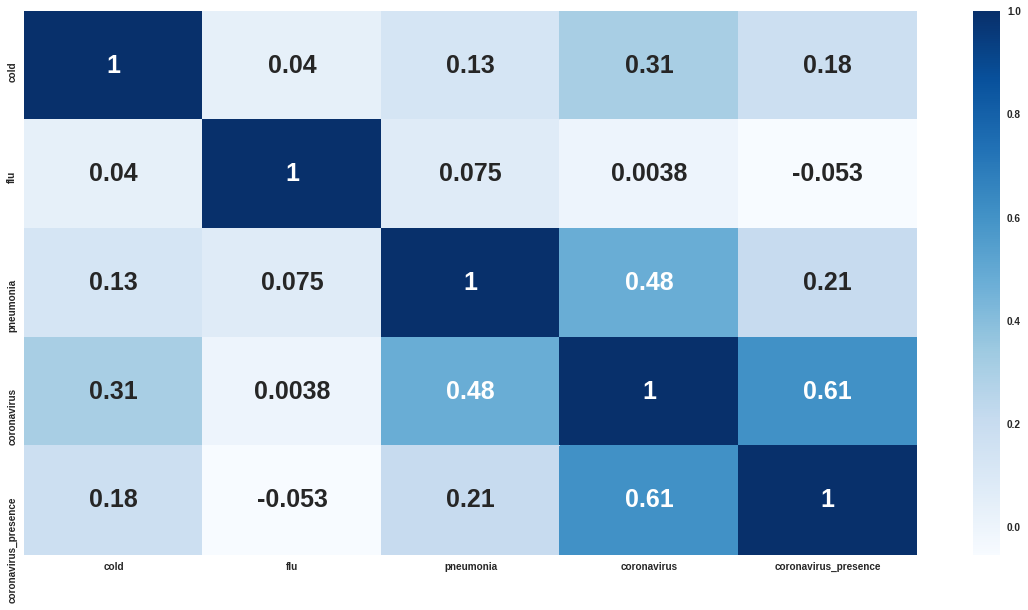

In [ ]:
# Check for correlation
#d.corr() #less representative way
plt.figure(figsize=(20,10))
sns.heatmap(search1[search1.columns].corr(),cmap="Blues",annot=True,annot_kws={"fontsize":25})
#sns.heatmap(seoul_info.corr(), cmap = 'YlGnBu', annot = True, annot_kws={"fontsize": 16}) 

In [ ]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(259, 4)
(65, 4)
(259, 1)
(65, 1)


In [ ]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    LinearDiscriminantAnalysis(),
    AdaBoostClassifier((DecisionTreeClassifier(random_state=rs)), random_state=rs, learning_rate=0.1),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state=rs),
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=10) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [ ]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 1.0 	 ---> LogisticRegression 
Accuracy: 1.0 	 ---> DecisionTreeClassifier 
Accuracy: 1.0 	 ---> SVC 
Accuracy: 0.75 	 ---> LinearDiscriminantAnalysis 
Accuracy: 1.0 	 ---> AdaBoostClassifier 
Accuracy: 1.0 	 ---> RandomForestClassifier 
Accuracy: 1.0 	 ---> GradientBoostingClassifier 


Text(0.5, 1.0, 'Cross validation scores')

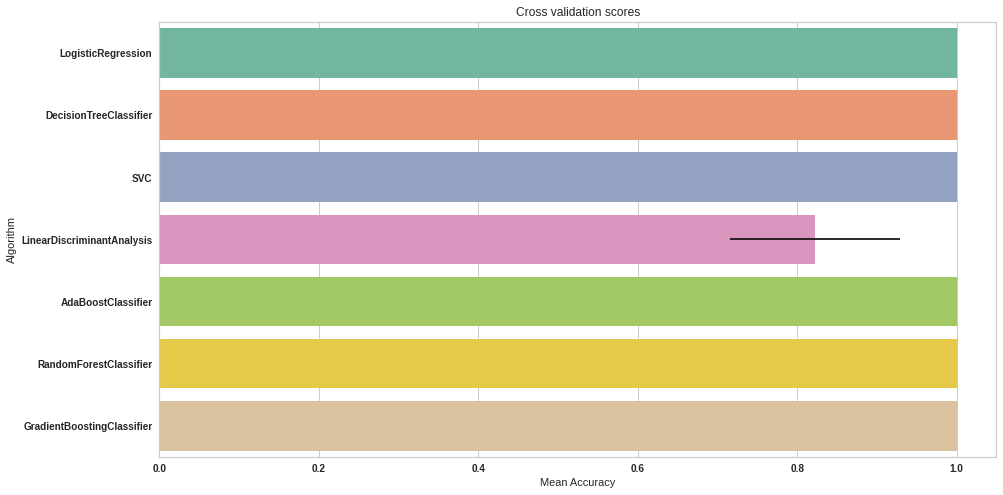

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(15,8))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

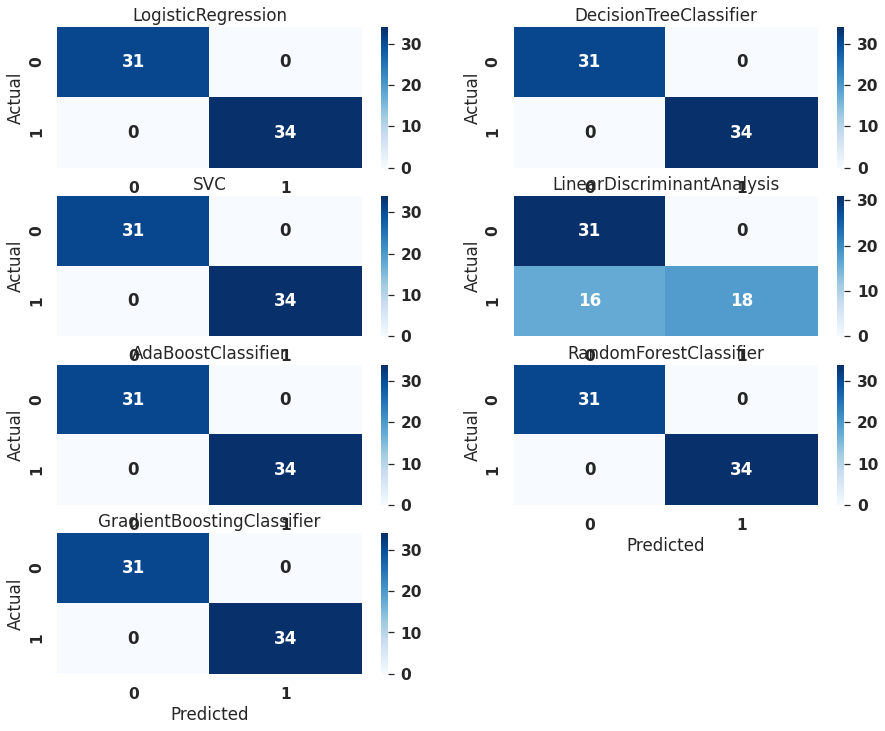

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(5,2,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

SVC Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        65
   macro avg 

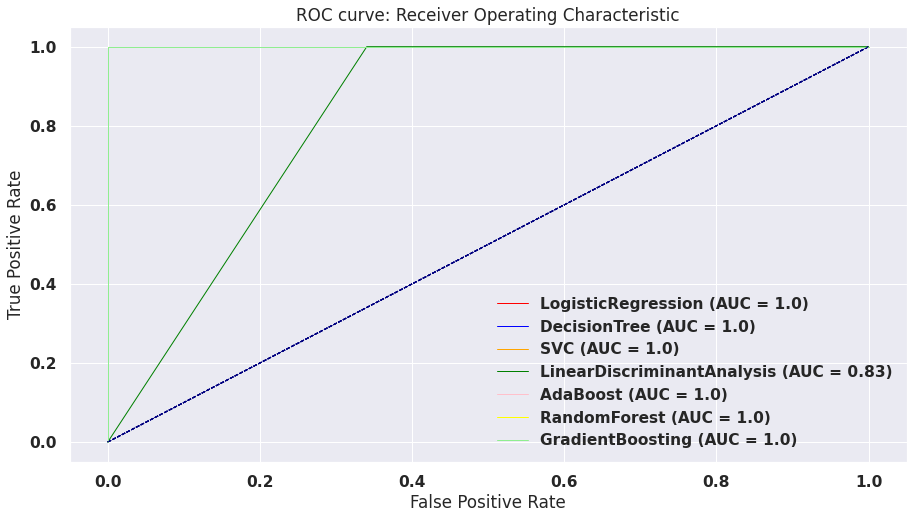

In [ ]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [ ]:
weather_ragg1=weather.groupby(by='date',as_index=False).sum()
weather_ragg=weather.groupby(by='date',as_index=False).mean()
weather_ragg.precipitation= weather_ragg1.precipitation
weather_ragg.drop('code', axis=1, inplace=True)
weather_ragg.info()
weather_ragg.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 0 to 1641
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1642 non-null   datetime64[ns]
 1   avg_temp               1642 non-null   float64       
 2   min_temp               1642 non-null   float64       
 3   max_temp               1642 non-null   float64       
 4   precipitation          1642 non-null   float64       
 5   max_wind_speed         1642 non-null   float64       
 6   most_wind_direction    1642 non-null   float64       
 7   avg_relative_humidity  1642 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 115.5 KB


date  avg_temp  ...  most_wind_direction  avg_relative_humidity
0 2016-01-01   3.11875  ...               215.00               66.11250
1 2016-01-02   6.67500  ...               225.00               70.92500
2 2016-01-03   7.56875  ...               241.25               77.26875
3 2016-01-04   6.25625  ...               271.25               56.38750
4 2016-01-05   1.71250  ...               245.00               41.88750

[5 rows x 8 columns]

In [ ]:
search_w = pd.merge(weather_ragg,search[['cold','flu','pneumonia','date','coronavirus_presence']],
                            how = 'inner', on = ['date'])
search_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 0 to 1641
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1642 non-null   datetime64[ns]
 1   avg_temp               1642 non-null   float64       
 2   min_temp               1642 non-null   float64       
 3   max_temp               1642 non-null   float64       
 4   precipitation          1642 non-null   float64       
 5   max_wind_speed         1642 non-null   float64       
 6   most_wind_direction    1642 non-null   float64       
 7   avg_relative_humidity  1642 non-null   float64       
 8   cold                   1642 non-null   float64       
 9   flu                    1642 non-null   float64       
 10  pneumonia              1642 non-null   float64       
 11  coronavirus_presence   1642 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 166.8 KB


In [ ]:
# Class balance
search_w.drop('date', axis=1, inplace=True)
cor = search_w[search_w.coronavirus_presence== 1]
no_cor = search_w[search_w.coronavirus_presence== 0]
print("CORONAVIRUS_PRESENCE: ", len(cor), "CORONAVIRUS_ABSENCE", len(no_cor))

KeyError: ignored

In [ ]:
balanced_search_w = pd.concat([cor, no_cor.sample(len(cor))])
x = balanced_search_w.iloc[:,:-1]
y = balanced_search_w.iloc[:,-1:]
balanced_search_w.shape

(324, 11)

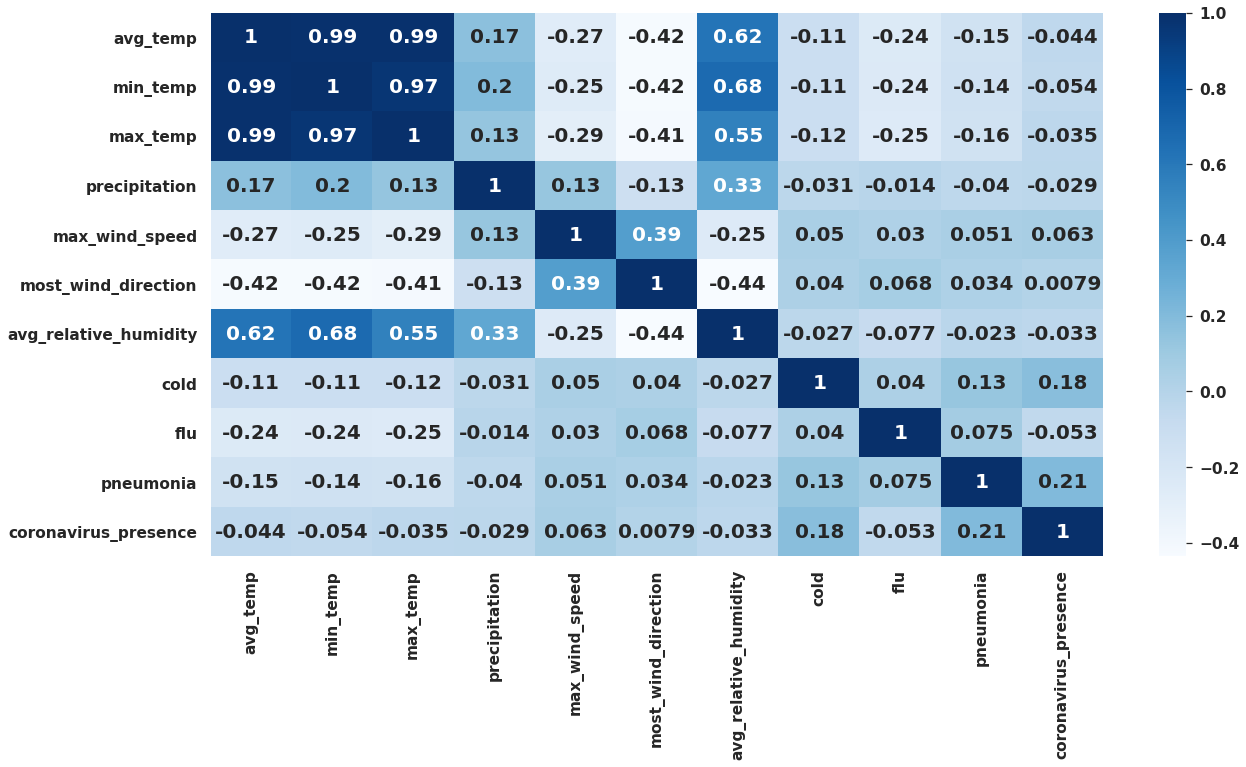

In [ ]:
# Check for correlation
plt.figure(figsize=(20,10))
sns.heatmap(search_w[search_w.columns].corr(),cmap="Blues",annot=True,annot_kws={"fontsize":20})
#sns.heatmap(seoul_info.corr(), cmap = 'YlGnBu', annot = True, annot_kws={"fontsize": 16}) 

In [ ]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(259, 10)
(65, 10)
(259, 1)
(65, 1)


In [ ]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    LinearDiscriminantAnalysis(),
    AdaBoostClassifier((DecisionTreeClassifier(random_state=rs)), random_state=rs, learning_rate=0.1),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state=rs),
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=10) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [ ]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.69 	 ---> LogisticRegression 
Accuracy: 0.86 	 ---> DecisionTreeClassifier 
Accuracy: 0.6 	 ---> SVC 
Accuracy: 0.71 	 ---> LinearDiscriminantAnalysis 
Accuracy: 0.91 	 ---> AdaBoostClassifier 
Accuracy: 0.95 	 ---> RandomForestClassifier 
Accuracy: 0.95 	 ---> GradientBoostingClassifier 


Text(0.5, 1.0, 'Cross validation scores')

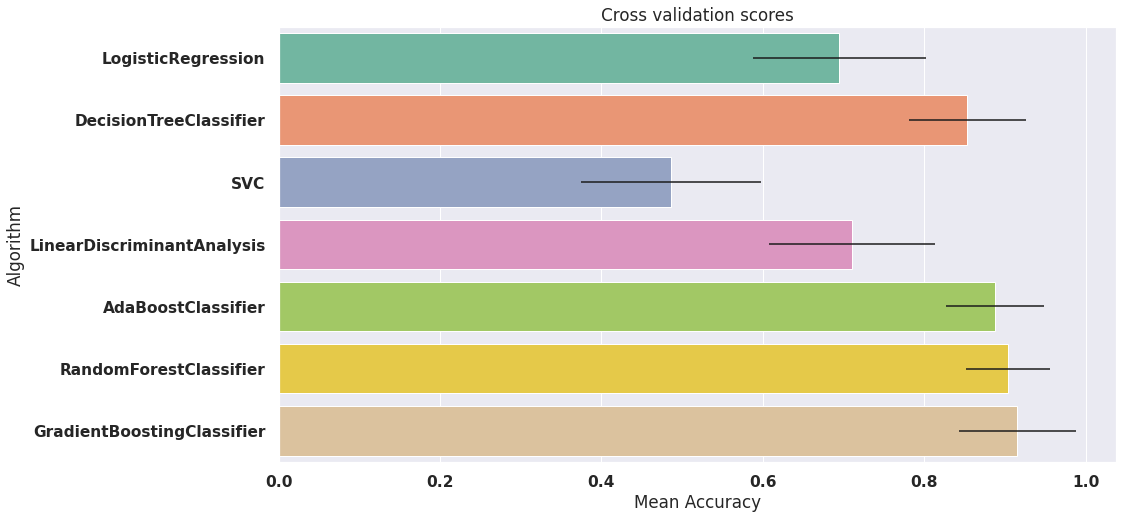

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(15,8))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

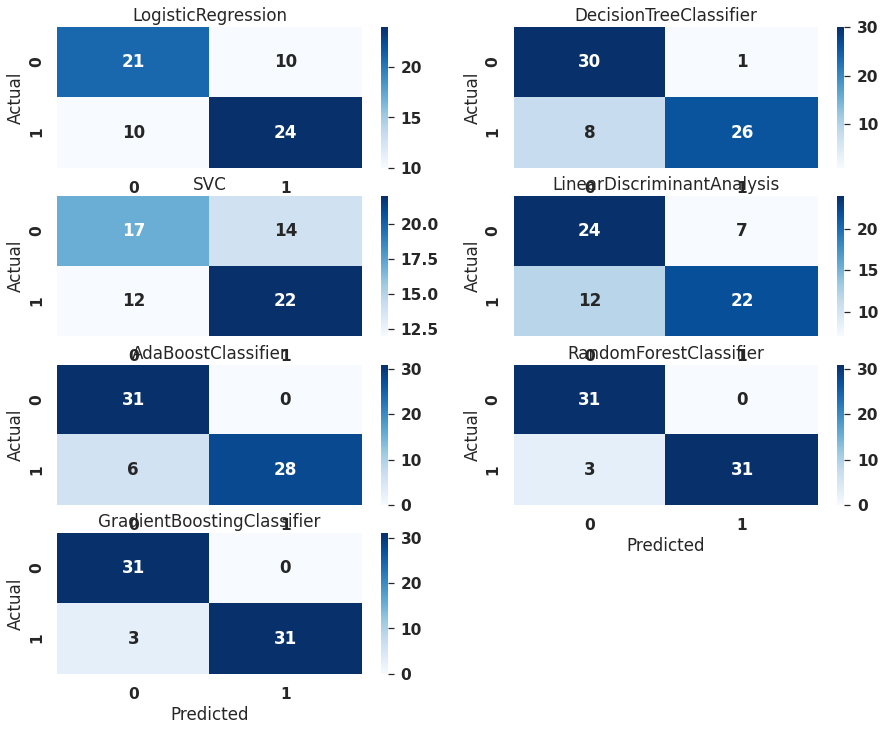

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(5,2,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68        31
         1.0       0.71      0.71      0.71        34

    accuracy                           0.69        65
   macro avg       0.69      0.69      0.69        65
weighted avg       0.69      0.69      0.69        65

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87        31
         1.0       0.96      0.76      0.85        34

    accuracy                           0.86        65
   macro avg       0.88      0.87      0.86        65
weighted avg       0.88      0.86      0.86        65

SVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57        31
         1.0       0.61      0.65      0.63        34

    accuracy                           0.60        65
   macro avg 

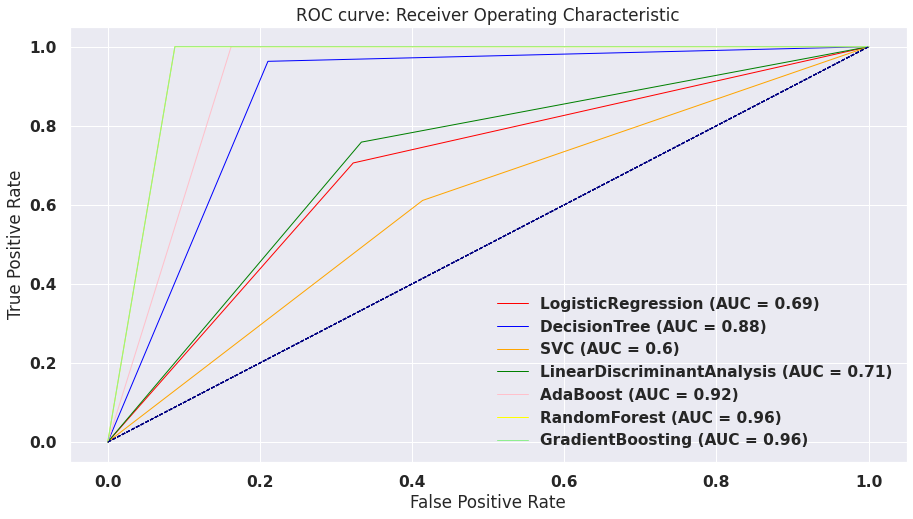

In [ ]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [ ]:
# Search grid for optimal parameters

DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

RF_param = {"max_depth": [None],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}

GB_param = {'loss' : ["deviance"],
            'n_estimators' : [100,200,300],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth': [4, 8],
            'min_samples_leaf': [100,150],
            'max_features': [0.3, 0.1]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
RFgs = GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
GBgs = GridSearchCV(GradientBoostingClassifier(), param_grid=GB_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, RFgs, GBgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train)
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   41.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   38.9s finished


In [ ]:
# scores without gridsearch
print("score without GridSearchCV: ", cv_acc[:2])
# scores with gridsearch
print("score with GridSearchCV: ", score)

In [ ]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("coronavirus_presence", axis=1).corr(),annot=True)
plt.title("Correlation between models")

In [ ]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('dt', gs_model[0]), ('rf', gs_model[1]), ('gb',gs_model[2])], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train)
print(accuracy_score(y_test,best_model.predict(x_test)))

# 5.Serie Temporali

Aggiungiamo le librerie per le serie temporali

In [ ]:
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
t_province["confirmed_g"]=0
t_province["confirmed_g"].loc[3]=1
t_province["released_g"]=0
t_province["deceased_g"]=0
for i in t_province.index:
    if i>17:
        t_province["confirmed_g"].loc[i]=t_province["confirmed"].loc[i]-t_province["confirmed"].loc[i-17]
        t_province["released_g"].loc[i]=t_province["released"].loc[i]-t_province["released"].loc[i-17]
        t_province["deceased_g"].loc[i]=t_province["deceased"].loc[i]-t_province["deceased"].loc[i-17]
t_province.drop(['confirmed','released','deceased'], axis=1, inplace=True)
t_province.info()
t_province.head()

KeyError: ignored

In [ ]:
time["test_g"]=1
time["confirmed_g"]=1
time['negative_g']=0
time['released_g']=0
time["deceased_g"]=0
for i in time.index:
    if i!=0:
        time["test_g"].loc[i]=time["test"].loc[i]-time["test"].loc[i-1]
        time["confirmed_g"].loc[i]=time["confirmed"].loc[i]-time["confirmed"].loc[i-1]
        time['negative_g'].loc[i]=time['negative'].loc[i]-time['negative_g'].loc[i-1]
        time['released_g'].loc[i]=time['released'].loc[i]-time['released'].loc[i-1]
        time["deceased_g"].loc[i]=time["deceased"].loc[i]-time["deceased"].loc[i-1]
        
time.index= time.date
time.drop(['test', 'confirmed', 'negative', 'released', 'deceased', 'time','date'], axis=1, inplace=True)
time.head()
time.info()

In [ ]:
test = time.test_g #[time.index> pd.to_datetime('2020-02-25')]
test.plot(figsize=(15, 5))